(sec:filter)=
# Filter

Filter sind spezielle Systeme, die in diesem Abschnitt grundsätzlich als
LTI-Systeme angenommen werden (es gibt auch nicht LTI-Filter wie z.B. das Median Filter, diese sind aber nicht-linear). Die Aufgabe von Filtern ist typischerweise bestimmte
Frequenzanteile aus dem Signal verändern, also zu verstärken, abzuschwächen oder ganz zu entfernen. 

Alle nicht-trivialen LTI-Systeme erzeugen eine Filterwirkung, trotzdem
werden nicht alle LTI-Systeme als Filter bezeichnet, wenn das Ziel beim
Entwurf nicht die Filterwirkung sondern irgendeine andere Eigenschaft
ist. Ein Beipiel sei die Berechnung des gleitenden Mittelwertes eines Signals. berechnen. Eine solches
System ist automatisch auch ein Filter, wird aber trotzdem nicht
unbedingt als solches bezeichnet. In vielen Fällen ist die Filterwirkung
sogar ein unerwünschter Nebeneffekt.

Ziel dieses Abschnittes ist es, die Grundtypen von Filtern kennen zu
lernen. Diese können als nicht-rekursive und rekursive Implementierungen vorliegen.
Abschließend werden in einer sehr kompakten Form einige bekannte
Entwurfsverfahren für die beiden Realisierungsformen vorgestellt.

## Filtertypen

Bei der Typisierung von Filtern schauen wir uns zunächst die sogenannten
Sperrfilter an. Ihr Entwurfsziel ist, möglichst einen bestimmten
Frequenzbereich vollständig aus dem Spektrum zu entfernen. Dabei wird
zwischen vier Grundtypen unterschieden:

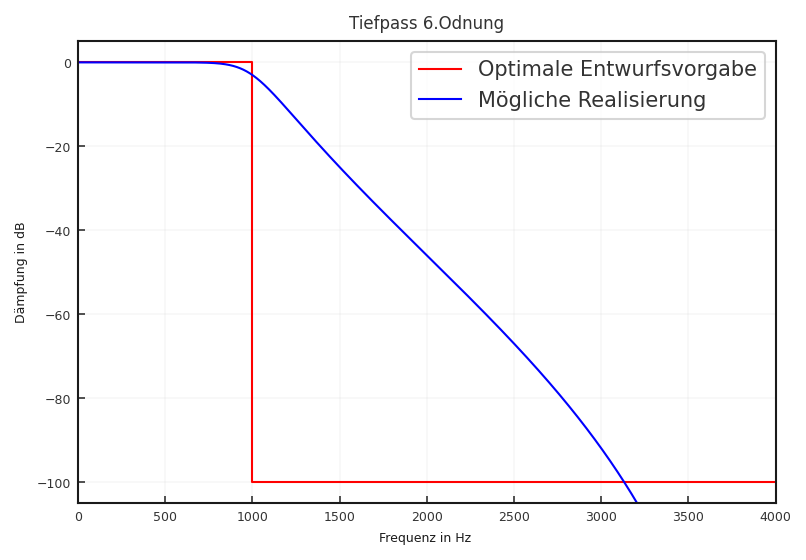

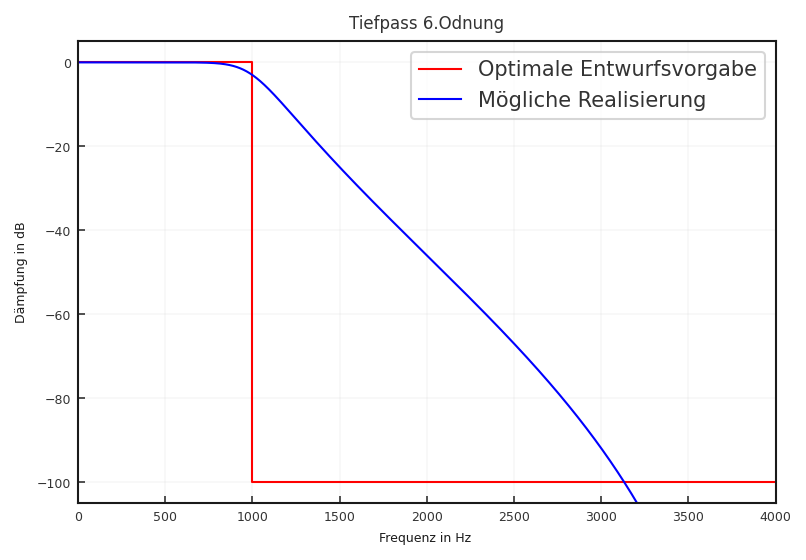

In [1]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   18.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
import scipy
from scipy import signal
from matplotlib import pyplot

# Script to create an ideal and realistic lowpass

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

Fs = 8000
fg = 1000 # cutoff frequency
order = 6
x = [0.0]*Fs
x[0] = 1.0
b, a = scipy.signal.butter(N=order, Wn=fg, btype='low', output='ba', fs=Fs)
y = scipy.signal.lfilter(b, a, x)
spectrum = numpy.fft.fft(y)

# dB, max amplitude = 0dB
spectrum_abs = 20*numpy.log10(numpy.abs(spectrum)/numpy.abs(spectrum).max()) 
freq_vec = numpy.linspace(0, Fs, len(spectrum_abs)) # freq bins, for plotting

fig, ax_spectrum = pyplot.subplots()

# ideal frequency respose of filter
ax_spectrum.step(y=[0, 0, -100, - 100, 0], x=[0, fg, Fs/2, Fs-fg, Fs], 
        color='r', label="Optimale Entwurfsvorgabe")
# actual realization
ax_spectrum.plot(freq_vec, spectrum_abs, color='b', 
        label="Mögliche Realisierung")

ax_spectrum.set(xlabel='Frequenz in Hz ', ylabel='Dämpfung in dB', 
        xlim=[0, Fs/2], ylim=[-105, 5], title=f'Tiefpass {order}.Odnung')
pyplot.legend()

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("DesignTP", fig, display=False)

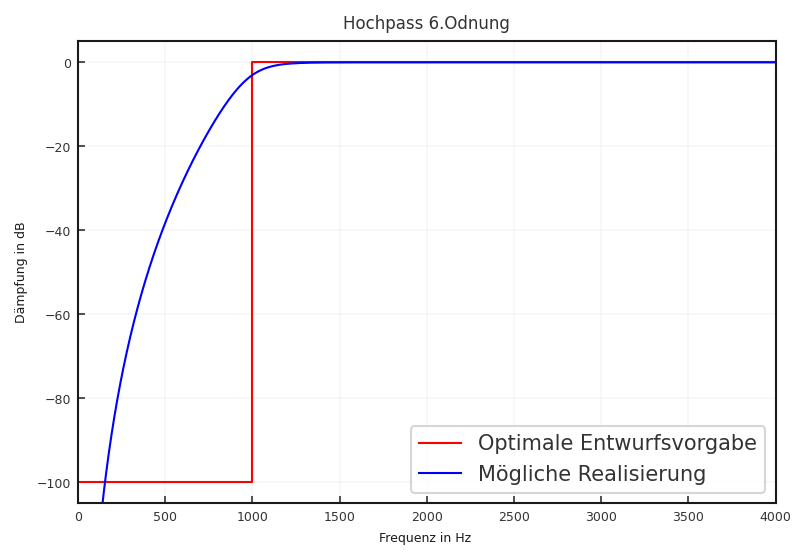

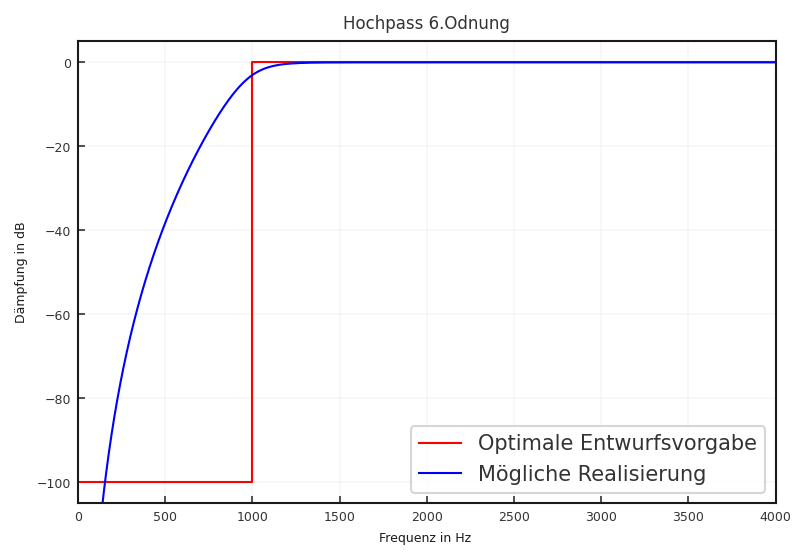

In [2]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   18.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
import scipy
from scipy import signal
from matplotlib import pyplot

# Script to create an ideal and realistic highpass

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

Fs = 8000
fg = 1000 # cutoff frequency
order = 6
x = [0.0]*Fs
x[0] = 1.0
b, a = scipy.signal.butter(N=order, Wn=fg, btype='high', output='ba', fs=Fs)
y = scipy.signal.lfilter(b, a, x)
spectrum = numpy.fft.fft(y)

# dB, max amplitude = 0dB
spectrum_abs = 20*numpy.log10(numpy.abs(spectrum)/numpy.abs(spectrum).max()) 
freq_vec = numpy.linspace(0, Fs, len(spectrum_abs)) # freq bins, for plotting

fig, ax_spectrum = pyplot.subplots()

# ideal frequency respose of filter
ax_spectrum.step(y=[-100, -100, 0, 0, -100], x=[0, fg, Fs/2, Fs-fg, Fs], 
        color='r', label="Optimale Entwurfsvorgabe")
# actual realization
ax_spectrum.plot(freq_vec, spectrum_abs, 
        color='b', label="Mögliche Realisierung")

ax_spectrum.set(xlabel='Frequenz in Hz ', ylabel='Dämpfung in dB', 
        xlim=[0, Fs/2], ylim=[-105, 5], title=f'Hochpass {order}.Odnung')
pyplot.legend()

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("DesignHP", fig, display=False)

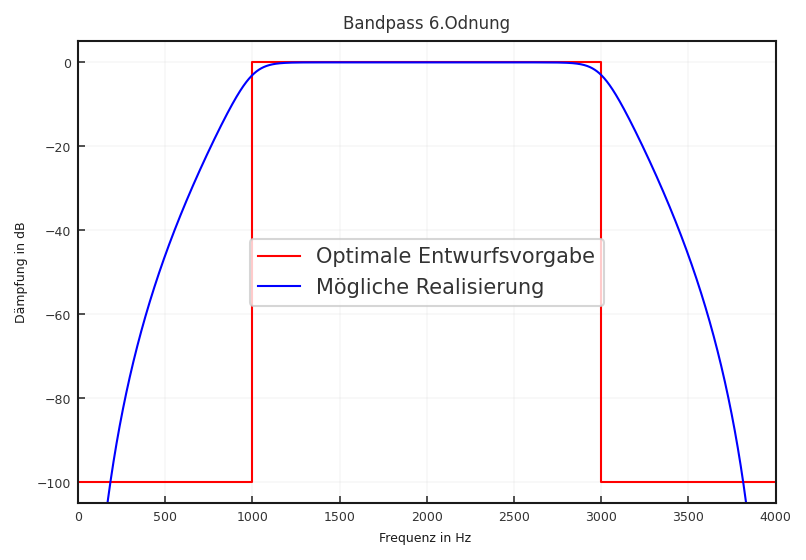

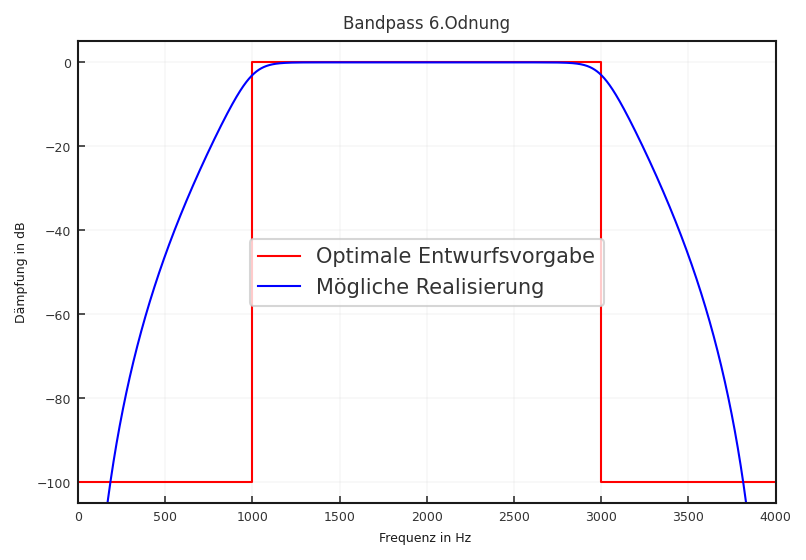

In [3]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   18.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
import scipy
from scipy import signal
from matplotlib import pyplot

# Script to create an ideal and realistic bandpass

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

Fs = 8000
fg = [1000, 3000]# cutoff frequency
order = 6
x = [0.0]*Fs
x[0] = 1.0
b,a = scipy.signal.butter(N=order, Wn=fg, btype='bandpass', output='ba', fs=Fs)
y = scipy.signal.lfilter(b, a, x)
spectrum = numpy.fft.fft(y)
# dB, max amplitude = 0dB
spectrum_abs = 20*numpy.log10(numpy.abs(spectrum)/numpy.abs(spectrum).max()) 
freq_vec = numpy.linspace(0, Fs, len(spectrum_abs)) # freq bins, for plotting

fig, ax_spectrum = pyplot.subplots()

# ideal frequency respose of filter
ax_spectrum.step(y=[-100, -100, 0, -100, -100, 0, -100], 
        x=[0, fg[0], fg[1], Fs/2, Fs-fg[1], Fs-fg[0], Fs], 
        color='r', label="Optimale Entwurfsvorgabe")
# actual realization
ax_spectrum.plot(freq_vec, spectrum_abs, 
        color='b', label="Mögliche Realisierung")
ax_spectrum.set(xlabel='Frequenz in Hz ', ylabel='Dämpfung in dB', 
        xlim=[0, Fs/2], ylim=[-105, 5], title=f'Bandpass {order}.Odnung')
pyplot.legend()

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("DesignBP", fig, display=False)

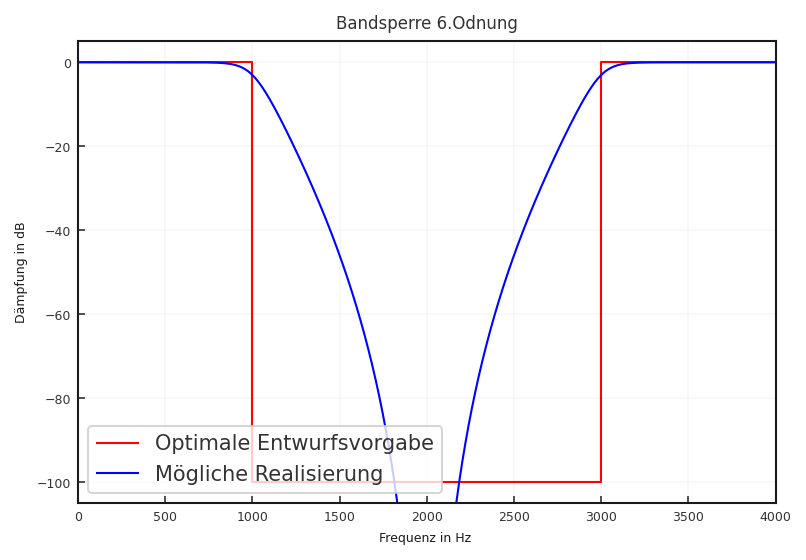

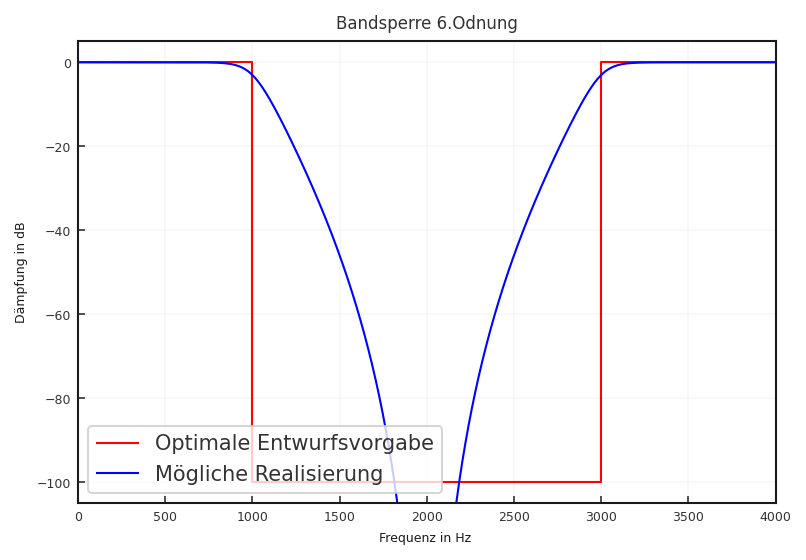

In [4]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   18.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
import scipy
from scipy import signal
from matplotlib import pyplot

# Script to create an ideal and realistic bandstop

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

Fs = 8000
fg = [1000, 3000]# cutoff frequency
order = 6
x = [0.0]*Fs
x[0] = 1.0
b,a = scipy.signal.butter(N=order, Wn=fg, btype='bandstop', output='ba', fs=Fs)
y = scipy.signal.lfilter(b, a, x)
spectrum = numpy.fft.fft(y)
# dB, max amplitude = 0dB
spectrum_abs = 20*numpy.log10(numpy.abs(spectrum)/numpy.abs(spectrum).max()) 
freq_vec = numpy.linspace(0, Fs, len(spectrum_abs)) # freq bins, for plotting


fig, ax_spectrum = pyplot.subplots()

# ideal frequency respose of filter
ax_spectrum.step(y=[0, 0, -100, 0, 0, -100, 0], 
        x=[0, fg[0], fg[1], Fs/2, Fs-fg[1], Fs-fg[0], Fs], 
        color='r', label="Optimale Entwurfsvorgabe")
# actual realization
ax_spectrum.plot(freq_vec, spectrum_abs, 
        color='b', label="Mögliche Realisierung")

ax_spectrum.set(xlabel='Frequenz in Hz ', ylabel='Dämpfung in dB', 
        xlim=[0, Fs/2], ylim=[-105, 5], title=f'Bandsperre {order}.Odnung')
pyplot.legend()

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("DesignBS", fig, display=False)

`````{tab-set}
````{tab-item} Tiefpass
   **Tiefpass:** Ziel des Tiefpasses ist es alle hohen Frequenzen ab
    einer zu definierenden Grenzfrequenz $f_\text{g}$ aus dem Spektrum zu
    entfernen. In der technischen Umsetzung ist es aber nicht möglich,
    einen abrupten Übergang zwischen dem sog. Durchlassbereich (tiefe
    Frequenzen beim Tiefpass) und dem Sperrbereich zu realisieren. Eine
    praktische Realisierung hat deshalb immer bestimmte Grenz- und
    Übergangsbereiche.

```{glue:figure} DesignTP
:figwidth: 100%
:name: fig:DesignTP
Optimaler
    Entwurf eines Tiefpasses ($f_\text{s}$ = 8 kHz und Grenzfrequenz = $f_\text{g}$ =
    1 kHz) und Realisierung durch Butterworth-Filter 6. Ordnung (siehe {numref}`Abschnitt %s <sec:Butterworth-Filter>`)
```
````

````{tab-item} Hochpass
   **Hochpass:** Das inverse Designziel zum Tiefpass liegt dem
    Hochpassentwurf zu Grunde. Es sollen möglichst alle tiefen
    Frequenzen aus dem Spektrum entfernt werden. Auch hier gelten die
    beim Tiefpass erwähnten Einschränkungen.

```{glue:figure} DesignHP
:figwidth: 100%
:name: fig:DesignHP
Optimaler
    Entwurf eines Hochpasses ($f_\text{s}$ = 8 kHz und Grenzfrequenz = $f_\text{g}$ =
    1 kHz) und Realisierung durch Butterworth-Filter 6. Ordnung (siehe {numref}`Abschnitt %s <sec:Butterworth-Filter>`)
```
````

````{tab-item} Bandpass
   **Bandpass:** Im Gegensatz zu den vorher erwähnten Typen hat das
    Bandpassfilter zwei Grenzfrequenzen $f_1$ und $f_2$. Das
    Designziel ist, nur die Frequenzen zwischen $f_1$ und $f_2$
    durchzulassen und alle Frequenzen unterhalb von $f_1$ bzw. oberhalb
    von $f_2$ zu entfernen. Die Differenz zwischen $f1$ und $f_2$ wird
    Bandbreite $B = f_2 -
        f_1$ genannt.    

```{glue:figure} DesignBP
:figwidth: 100%
:name: fig:DesignBP
Optimaler
    Entwurf eines Bandpasses ($f_\text{s}$ = 8 kHz und Grenzfrequenz $f_1$ = 1
    kHz und $f_2 =$ 3 kHz) und Realisierung durch Butterworth-Filter 6.
    Ordnung (siehe {numref}`Abschnitt %s <sec:Butterworth-Filter>`)
```
````

````{tab-item} Bandsperre
   **Bandsperre:** Die Bandsperre stellt die inverse Funktion zum
    Bandpass dar. Bei diesem Entwurf sollen möglichst alle Frequenzen im
    Bereich zwischen $f_1$ und $f_2$ aus dem Spektrum entfernt werden.

```{glue:figure} DesignBS
:figwidth: 100%
:name: fig:DesignBS
Optimaler
    Entwurf einer Bandsperre ($f_\text{s}$ = 8 kHz und Grenzfrequenz $f_1$ = 1
    kHz und $f_2 =$ 3 kHz) und Realisierung durch Butterworth-Filter 6.
    Ordnung (siehe {numref}`Abschnitt %s <sec:Butterworth-Filter>`)
```
````
`````

Eine weitere Gruppe von Filtern hat das Ziel, Signale die durch eine
Übertragung verändert wurden, wieder in ihre ursprüngliche Form zurück
zu bringen. Das Ziel ist also, ein verändertes Spektrum zu begradigen,
bzw. auszugleichen. Aus dieser Aufgabe folgt auch die verwendete
englische Typbezeichnung Equalizer. In der Tonstudiotechnik werden diese
Filter zwar nicht nur zu diesem Zweck verwendet, aber auch dort werden
die Klangformungsfilter als Equalizer bezeichnet. Equalizer ist ein sehr
allgemeiner Begriff und kann Filter beinhalten, die eine vollständige
Vorgabe der Übertragungsfunktion versuchen zu realisieren. Zum Beispiel
bei der Hörgeräteanpassung, die eine vollständige Beschreibung des
Hörverlustes als Ausgangsbasis verwendet. Oder aber es werden nur
bestimmte Bereiche verändert. Zu dieser letzten Gruppe gehören die
Equalizer, wie sie in der Tonstudiotechnik verwendet werden. Hierbei
wird zwischen den parametrischen Equalizern und den sogenannten
Terzband-Equalizern (eine (große) Terz beschreibt eine drittel Oktave, 
die wiederum eine Frequenzverdoppelung beschreibt) unterschieden.

Bei den parametrischen Equalizern können durch die drei Parameter

-   Frequenz,

-   Verstärkung bzw. Abschwächung und

-   Güte ($Q$-Faktor)

sehr genaue Eingriffe in das Klangspektrum vorgenommen werden. Dabei ist
die Güte $Q = \frac{f_\text{m}}{B}$ als Verhältnis von Mittenfrequenz $f_\text{m}$ und Bandbreite $B$ definiert.

/home/bitzer/SoftDev/Python/virtEnv/SE/lib/python3.10/site-packages/scipy/signal/_filter_design.py:474: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
/tmp/ipykernel_40617/493702970.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  den = (1 + K/Q + K*K)
/tmp/ipykernel_40617/493702970.py:49: RuntimeWarning: divide by zero encountered in double_scalars
  b[0] = (1 + V0*K/Q + K*K)
/tmp/ipykernel_40617/493702970.py:51: RuntimeWarning: divide by zero encountered in double_scalars
  b[2] = (1 - V0*K/Q + K*K)
/tmp/ipykernel_40617/493702970.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  a[2] = (1 - K/Q + K*K)
/tmp/ipykernel_40617/493702970.py:65: RuntimeWarning: invalid value encountered in divide
  b /= den
/tmp/ipykernel_40617/493702970.py:66: RuntimeWarning: invalid value encountered in divide
  a[1:] /= den


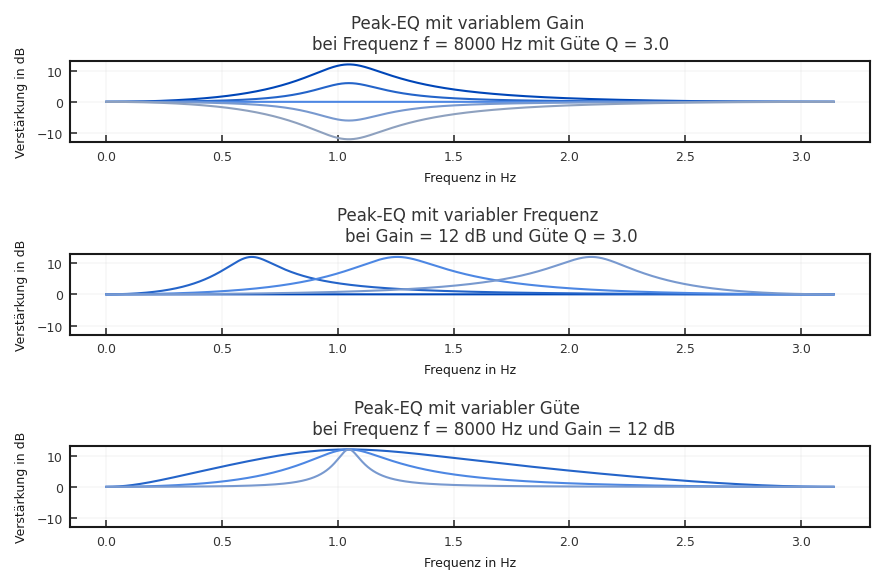

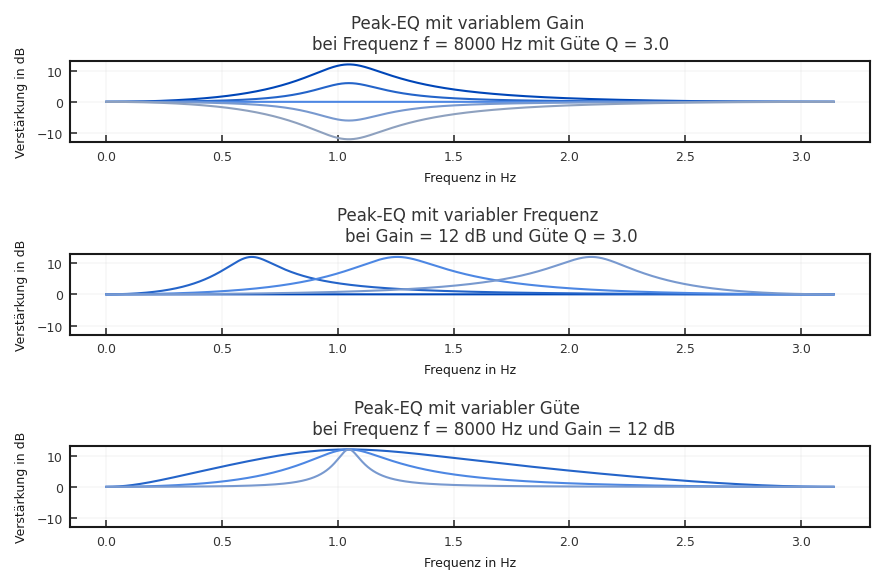

In [5]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   18.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from scipy import signal
from matplotlib import pyplot
from matplotlib.widgets import Slider

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

def get_peak_EQ(f_0, gain_dB, Q, f_s):
    '''
    calculates filter coefficients of a peak equalizer
    with the given parameters
    
    Parameters:
    -----------
    f_0 : int
        peak frequency in Hz
    gain_dB : int
        dB gain at peak
    Q : float
        Quality of filter
    f_s : int
        sampling frequency
    '''
    K = numpy.tan(2*numpy.pi*f_0/(f_s*2))
    a = [0]*3
    b = [0]*3
    den = 1
    if (gain_dB > 0):
        V0 = 10**(gain_dB/20)
        den = (1 + K/Q + K*K)
        b[0] = (1 + V0*K/Q + K*K)
        b[1] = 2 * (K*K - 1)
        b[2] = (1 - V0*K/Q + K*K)
        a[0] = 1
        a[1] = 2 * (K*K - 1)
        a[2] = (1 - K/Q + K*K)
    else:
        V0 = 10**(-gain_dB/20)
        den = (1 + V0*K/Q + K*K)
        b[0] = (1 + K/Q + K*K)
        b[1] = 2 * (K*K - 1)
        b[2] = (1 - K/Q + K*K)
        a[0] = 1
        a[1] = 2 * (K*K - 1)
        a[2] = (1 - V0*K/Q + K*K)
    
    b /= den
    a[1:] /= den
    
    return b, a
    

gains = [12, 6, 0, -6, -12]
fs = 48000
freq= 8000
Q = 3

fig, (ax_gain, ax_freq, ax_Q) = pyplot.subplots(3, 1)

for gain in gains:
    b, a = get_peak_EQ(freq, gain, Q, fs) # get filter coeefficients        
    w, h = signal.freqz(b, a, fs) # calculate impulse response
    h_db = 20*numpy.log10(numpy.abs(h)) # dB
    ax_gain.plot(w, h_db)

ax_gain.set(ylim=[-13, 13], xlabel='Frequenz in Hz', ylabel='Verstärkung in dB',     
        title=f'Peak-EQ mit variablem Gain \n\
        bei Frequenz f = {freq} Hz mit Güte Q = {Q:.1f}')

freqs = [0, fs/10, fs/5, fs/3]
gain = 12
for freq in freqs:
    b, a = get_peak_EQ(freq, gain, Q, fs) # get filter coeefficients
    w, h = signal.freqz(b, a, fs) # calculate impulse response
    h_db = 20*numpy.log10(numpy.abs(h)) # dB
    ax_freq.plot(w, h_db)
ax_freq.set(ylim=[-13, 13], xlabel='Frequenz in Hz', ylabel='Verstärkung in dB', 
        title=f'Peak-EQ mit variabler Frequenz \n\
        bei Gain = {gain} dB und Güte Q = {Q:.1f}')
Qs = [0, 1, 3, 10]
freq = 8000

for Q in Qs:
    b, a = get_peak_EQ(freq, gain, Q, fs) # get filter coeefficients
    w, h = signal.freqz(b, a, fs) # calculate impulse response
    h_db = 20*numpy.log10(numpy.abs(h)) # dB
    ax_Q.plot(w, h_db)
ax_Q.set(ylim=[-13, 13], xlabel='Frequenz in Hz', ylabel='Verstärkung in dB', 
         title=f'Peak-EQ mit variabler Güte \n\
         bei Frequenz f = {freq} Hz und Gain = {gain} dB')

pyplot.tight_layout()

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("EQ_GainParam", fig, display=False)

`````{tab-set}
````{tab-item} Buchabbildung
```{glue:figure} EQ_GainParam
:figwidth: 100%
:name: "fig:EQ_GainParam"
Equalizerübertragungskurve bei Veränderung der
Güte
```
````
````{tab-item} Interaktiv arbeiten
1) Starten des interaktiven Programms - `Filter_Peak_EQ.py` in `jupyterbook/code/interactive_programs/`
2) Mit Slidern Parameter einstellen
````
`````

Es gibt auch noch spezielle Filter für den Hoch- und Tiefpassbereich,
die als Kuhschwanzfilter (Shelving-Filter) bezeichnet werden. Hierbei
stehen nur die zwei Parameter Frequenz und Verstärkung bzw. Abschwächung
zur Verfügung.

[1.84021477 0.30423235 0.32462989] [1, -0.6202041028867289, 0.2404082057734575]
[ 2.76465122 -3.39351346  1.24906634] [1, -0.6202041028867289, 0.2404082057734575]
[ 1.31099651 -0.31157122  0.23804458] [1, -0.6202041028867289, 0.2404082057734575]
[ 1.6196294  -1.54610276  0.54667747] [1, -0.6202041028867289, 0.2404082057734575]
[ 1.         -0.6202041   0.24040821] [1, -0.6202041028867289, 0.2404082057734575]
[ 1.         -0.6202041   0.24040821] [1, -0.6202041028867289, 0.2404082057734575]
[ 0.76277854 -0.47307838  0.18337822] [1, -0.23765983738092392, 0.1815752978488014]
[ 0.6174252  -0.38292964  0.14843408] [1, -0.9546028024758235, 0.3375324434830565]
[ 0.54341483 -0.33702811  0.13064138] [1, 0.16532437058262686, 0.17640869591729713]
[ 0.36170928 -0.22433358  0.08695788] [1, -1.2274653060919034, 0.45179888502875243]
[ 1. -2.  1.] [1, -2.0, 1.0]
[ 3.98107171 -7.96214341  3.98107171] [1, -2.0, 1.0]
[ 1.49329723 -0.74080249  0.32168239] [1, -1.1429805025399011, 0.4128015980961886]
[ 3.1

/home/bitzer/SoftDev/Python/virtEnv/SE/lib/python3.10/site-packages/scipy/signal/_filter_design.py:474: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /


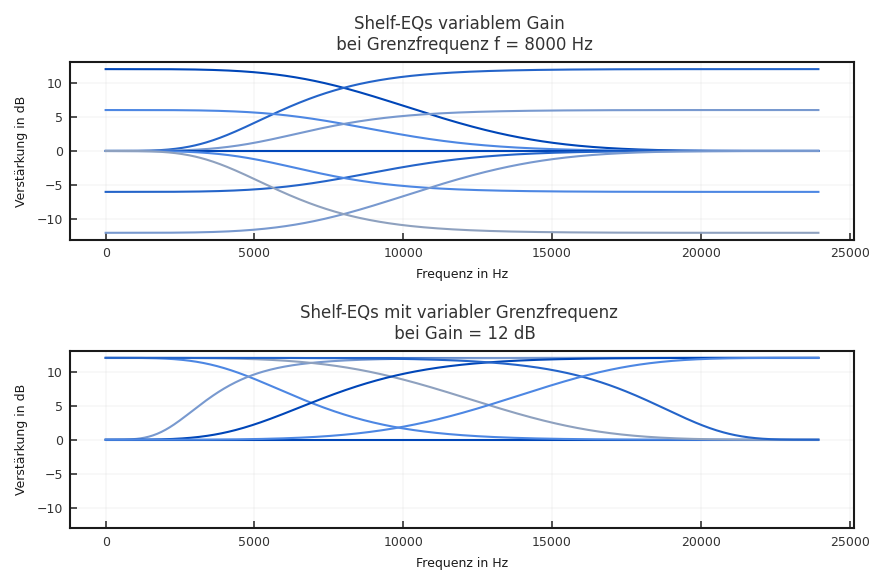

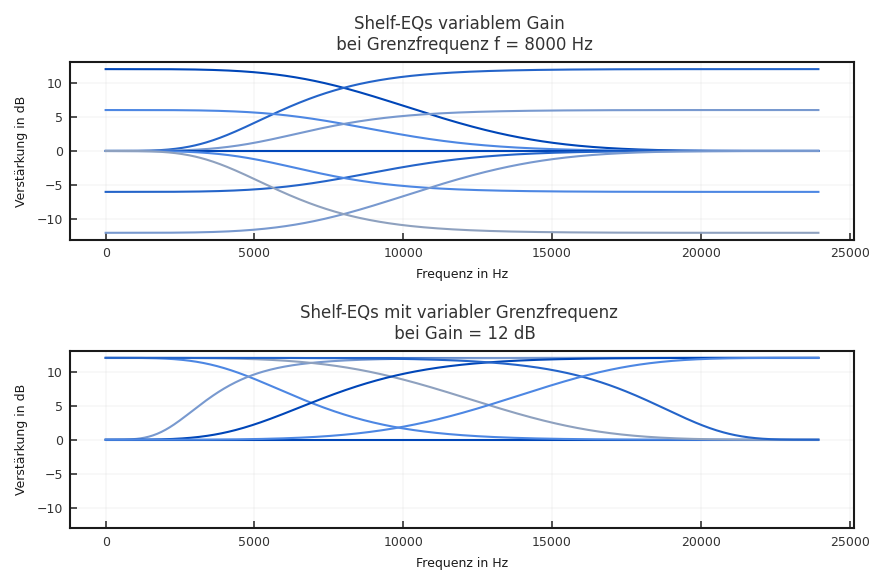

In [6]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   18.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from scipy import signal
from matplotlib import pyplot
from matplotlib.widgets import RadioButtons
from matplotlib.widgets import Slider

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

def getShelvingEQ(f_0, Gain_dB, shelf_type, fs):
    '''
    calculates filter coefficients of a shelving equalizer
    with the given parameters
    
    Parameters:
    -----------
    f_0 : int
        peak frequency in Hz
    gain_dB : int
        dB gain at peak
    shelf_type : str
        "high" for high-shelf, anything else for low shelf
    fs : int
        sampling frequency
    '''

    K = numpy.tan(2*numpy.pi*f_0/(fs*2))
    a = [0]*3
    b = [0]*3
    den = 1
    
    if (shelf_type == "high"): # High-Shelf
        if (Gain_dB > 0):
            V0 = 10**(Gain_dB/20)
            den = 1 + numpy.sqrt(2)*K + K*K
            b[0] = V0 + numpy.sqrt(2*V0)*K+K*K 
            b[1] = 2 * (K*K - V0) 
            b[2] = V0 - numpy.sqrt(2*V0)*K + K*K  
            a[0] = 1
            a[1] = 2 * (K*K - 1)            
            a[2] = 1 - numpy.sqrt(2)*K + K*K  
            b /= den
            a[1:] /= den
        else:
            V0 = 10**(-Gain_dB/20)
            den = V0 + numpy.sqrt(V0*2)*K + K*K
            b[0] = 1 + numpy.sqrt(2)*K + K*K 
            b[1] = 2 * (K*K - 1) 
            b[2] = 1 - numpy.sqrt(2)*K + K*K  
            b /= den
            den = 1 + numpy.sqrt(2/V0)*K + K*K/V0
            a[0] = 1
            a[1] = 2 * (K*K/V0 - 1) 
            a[2] = (1 - numpy.sqrt(2/V0)*K + K*K/V0)  
            a[1:] /= den
    else: #Low-Shelf 0 or default for != 1
        if (Gain_dB > 0):
            V0 = 10**(Gain_dB/20)
            den = 1 + numpy.sqrt(2)*K + K*K
            b[0] = 1 + numpy.sqrt(2*V0)*K + V0*K*K 
            b[1] = 2 * (V0*K*K - 1) 
            b[2] = 1 - numpy.sqrt(2*V0)*K + V0*K*K  
            a[0] = 1
            a[1] = 2 * (K*K - 1) 
            a[2] = 1 - numpy.sqrt(2)*K + K*K  
        else:
            V0 = 10**(-Gain_dB/20)
            den = 1 + numpy.sqrt(V0*2)*K + V0*K*K
            b[0] = 1 + numpy.sqrt(2)*K + K*K 
            b[1] = 2 * (K*K - 1) 
            b[2] = 1 - numpy.sqrt(2)*K + K*K  
            a[0] = 1
            a[1] = 2 * (V0*K*K - 1)
            a[2] = 1 - numpy.sqrt(V0*2)*K + V0*K*K
            
        b /= den
        a[1:] /= den

    return b, a

#parameters
gains = [12, 6, 0, -6, -12]
fs = 48000
f_c = 8000
shelf_types = ["low", "high"]

fig, (ax_gain, ax_freq) = pyplot.subplots(2, 1)

for gain in gains:
    for ftype in shelf_types:
        b, a = getShelvingEQ(f_c, gain, ftype, fs) # get filter coefficients
        print(b, a)
        w, h = signal.freqz(b, a, fs=fs) # calculate impulse response
        #with numpy.errstate(divide='ignore'):
        h_db = 20*numpy.log10(numpy.abs(h)) # dB
        ax_gain.plot(w, h_db)

ax_gain.set(ylim=[-13, 13], xlabel='Frequenz in Hz',ylabel='Verstärkung in dB', 
        title=f'Shelf-EQs variablem Gain \n bei Grenzfrequenz f = {f_c} Hz')

        

freqs = [0, fs/10, fs/5, fs/3]
gain = 12
for f_c in freqs:
    for ftype in shelf_types:
        b, a = getShelvingEQ(f_c, gain, ftype, fs) # get filter coefficients
        print(b, a)
        w, h = signal.freqz(b, a, fs = fs) # calculate impulse response
        with numpy.errstate(divide='ignore'):
            h_db = 20*numpy.log10(numpy.abs(h)) # dB
        ax_freq.plot(w, h_db)
ax_freq.set(ylim=[-13, 13], xlabel='Frequenz in Hz',ylabel='Verstärkung in dB', 
        title=f'Shelf-EQs mit variabler Grenzfrequenz \n bei Gain = {gain} dB')

pyplot.tight_layout()

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("EQ_ShelvParam", fig, display=False)

`````{tab-set}
````{tab-item} Buchabbildung
```{glue:figure} EQ_ShelvParam
:figwidth: 100%
:name: "fig:EQ_ShelvParam"

Equalizerübertragungskurven eines Hoch bzw. Tiefpasskuhschwanzfilters bei Veränderung der Verstärkung und Frequenz
```
````
````{tab-item} Interaktiv arbeiten
1) Starten des interaktiven Programms - `Filter_Shelving_EQ.py` in `jupyterbook/code/interactive_programs/`
2) Mit Slidern Parameter einstellen
````
`````

Im Gegensatz zu den vollparametrischen EQs sind bei einem Terzband-Equalizer
die Frequenzen und Güten festgelegt. Der Nutzer hat nur einen Einfluss
auf die Verstärkung oder Absenkung. Der Vorteil dieser Equalizer ist ihre
einfache Bedienung und die Möglichkeit sofort zu sehen, welche
Frequenzveränderungen vorgenommen werden. Die Mittenfrequenzen der
Filter sind standardisiert:

In [7]:
import pandas

df_oktav = pandas.DataFrame(data = {
    'index':[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4], 
    'Frequenz (Hz)':[31.5, 63, 125, 250, 500, 1000, 2000, 4000, 8000, 16000]})
df_terz = pandas.DataFrame(data = {
    'index': [-16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, 
     -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] ,
    'Frequenz (Hz)': [25,31.5, 40, 50, 63, 80, 100, 125, 160, 200, 250, 
     315, 400, 500, 630, 800,1000,1250,1600,2000,2500,
     3150,4000,5000,6300,8000,10000,12500,16000,20000]})
df_oktav = df_oktav.set_index('index')
df_terz = df_terz.set_index('index')

glue("df_oktav", df_oktav, display=False)
glue("df_terz", df_terz, display=False)

,Frequenz (Hz)
index,
-5,31.5
-4,63.0
-3,125.0
-2,250.0
-1,500.0
0,1000.0
1,2000.0
2,4000.0
3,8000.0


,Frequenz (Hz)
index,
-16,25.0
-15,31.5
-14,40.0
-13,50.0
-12,63.0
-11,80.0
-10,100.0
-9,125.0
-8,160.0


`````{grid}

````{grid-item-card} Oktav-EQ
```{glue:figure} df_oktav
:figwidth: 300px
:name: tab:df_oktav
```
````
````{grid-item-card} Terz-EQ
```{glue:figure} df_terz
:figwidth: 300px
:name: tab:df_terz
```
````
`````

Für bestimmte Anwendungen (z.B. Synthesizer) werden auch manchmal Filter
verwendet, die in ihrer Grundcharakteristik den Sperrfiltern
entsprechen, aber zusätzlich in der Nähe der Grenzfrequenz eine
Verstärkung einbringen. Diese Verstärkungsfrequenzen kommen bei
natürlichen Musikinstrumenten ebenfalls häufig vor. Man spricht in
diesem Fall von Resonanzfrequenzen, da bestimmte Signalanteile im
Filter eine starke Resonanz finden.

## Realisierungsformen

Wir haben gesehen, dass es eine Vielzahl von unterschiedlichen
Filtereinsatzmöglichkeiten gibt. Bisher wurde aber keinerlei Hinweis auf
die Realsierungsformen gegeben. Aus der Beschreibung von Systemen kennen
wir zwei unterschiedliche Systemarten. Die Systeme mit Rückkopplung
(rekursiv) und ohne Rückkopplung (transversal). Als Bezeichnung hatten wir 
Infinite Impulse Response (IIR) bzw. Finite Impulse Response (FIR) Systeme 
eingeführt. 
Und genau diese Bezeichnungen kennzeichnen auch die beiden grundsätzlichen 
Realisierungsformen von Filtern.

### FIR-Filter

Die Anwendung von FIR-Filtern ist ausschließlich durch digitale
Signalverarbeitung möglich, da eine Realisierung in Analogtechnk mit
elektrischen Bauelementen nicht möglich ist. FIR-Filter zeichnen sich
durch einige positive Eigenschaften aus. In erster Linie kann die
Stabilität immer garantiert werden. Alle FIR-Filter sind stabil.
Weiterhin ist es möglich mit FIR-Systemem Filter zu realisieren, die nur
den Betragsfrequenzgang verändern und sonst nur eine zeitliche
Verzögerung des Signals bewirken. Die zeitliche Verzögerung macht sich
in der Übertragungsfunktion durch eine lineare Phase deutlich. Diese
Filter werden deshalb linearphasig genannt.

#### Beschreibung als Blockdiagramm

Bisher haben wir FIR-Systeme nur als Differenzengleichung oder als
z-Übertragungsfunktion kennen gelernt. Um die noch folgende
Implementierung zu ermöglichen ist eine andere Darstellung aber
hilfreicher. Schaut man sich die Differenzengleichung für ein FIR-Filter
genauer an, so erkennt man, dass man 3 verschiedene Bauteile benötigt werden:

-   Addierer

-   Multiplizierer

-   Einen Verzögerungseinheit, die das Signal um genau ein Sample $T$
    verzögert. Dies kann durch ein einfaches Speicherelement geschehen.

Diese 3 Elemente werden im folgenden durch die in {numref}`Abbildung %s <fig:BlockdiagrammSymbole>` gezeigten Symbole beschrieben.

```{figure} ../images/psFilt/BlockdiagrammSymbole.png
---
width: 75%
name: fig:BlockdiagrammSymbole
---
Symbole zur Darstellung von Filterstrukturen als
Blockdiagramm.
```

Beispielsweise ergibt sich für ein FIR-System erster Ordnung, das durch
$y(k) = b_0 x(k) + b_1 x(k-1)$ beschrieben ist, das Blockschaltbild in 
{numref}`Abbildung %s <fig:FIRErsterOrdnung>`).

```{figure} ../images/psFilt/FIRErsterOrdnung.png
---
width: 30%
name: fig:FIRErsterOrdnung
---
Blockdiagramm eines FIR-Filters 1.
Ordnung
```

Zur Realisierung eines allgemeinen FIR-Filters muss das allgemeine
Blockschaltbild genauer betrachtet werden (siehe {numref}`Abbildung %s <fig:FIR_allgemeinBlock>`).

```{figure} ../images/psFilt/FIR_allgemeinBlock.png
---
width: 80%
name: fig:FIR_allgemeinBlock
---
Allgemeine FIR-Filter
Struktur.
```

Es wird deutlich, dass wir bei $N$ Koeffizienten $N-1$ Speicherelemente
benötigen, die die jeweilige Vergangenheit von $x(k)$ speichern.

Um einen Ausgangswert $y(k)$ zu berechnen, muss die Summe

$$
    y(k) = \sum_{i = 0}^{N-1} b_i x(k-i)
$$ (eq:FIR_Filter) 

berechnet werden.
Abschließend wird der Speicher um eine Stelle weiter geschoben.
Gleichung {eq}`eq:FIR_Filter` ist bereits von der Faltung bekannt. Somit
ist ein FIR-Filter also eine andere Bezeichnung für ein System zur
Faltung.

### FIR-Filter Design

Nachdem die Strukturen zur Realisierung von Filtern bekannt sind, fehlt
noch die Bestimmung der einzelnen Filterkoeffizienten. Es muss also
überlegt werden, wie aus einem bestimmten Entwurf des Filters im
Frequenzbereich, geeignete Koeffizienten im Zeitbereich berechnet werden
können. Dazu betrachten wir zunächst nur die FIR-Filter. Es sind
verschiedene Verfahren bekannt. Die beiden am häufigsten Methoden sollen
im weiteren genauer erläutert werden.

#### Fenster-Methode

Aus dem Abschnitt über Spektren ist uns bekannt, dass wir zu einer
Zeitfolge mit Hilfe der DTFT ein Spektrum berechnen können, dass in
$2\pi$ periodisch ist. Zu dieser Hintransformation gibt es auch die
korrespondierende Rücktransformation die als 

$$
    x(k) = \frac{1}{2\pi}\int_{-\pi}^{\pi} X(e^{j \Omega}) e^{j\Omega k} \text{d}\Omega
$$ (FIR:IDTFT:Def)
    
definiert ist. Somit ist es natürlich auch möglich zu einem bestimmten
Frequenzentwurf eine zugehörige Zeitfolge zu berechnen. Nehmen wir
beispielsweise an, wir suchen die Koeffizienten, um ein ideales
Tiefpassfilter mit der Grenzfrequenz $\Omega_\text{g}$ zu realisieren. Die
Definition der Übertragungsfunktion ist somit 

$$
    H(e^{j \Omega}) = \Bigg\{ \begin{array}{lcc}
1 & für & -\Omega_\text{g} \leq \Omega \leq  \Omega_\text{g}\\
0 & & \Omega_\text{g} < |\Omega| \leq \pi
\end{array}
$$ (FIR:BSP:Tiefpass)

Für die gesuchten Filterkoeffizienten ergibt sich

$$
\begin{aligned}
    h(k) & = &\frac{1}{2\pi}\int_{-\pi}^{\pi} H(e^{j \Omega}) e^{j\Omega k} \text{d}\Omega\\
         & = &\frac{1}{2\pi}\int_{-\Omega_\text{g}}^{\Omega_\text{g}}e^{j\Omega k} \text{d}\Omega\\
         & = &\frac{\Omega_\text{g}}{\pi} \frac{\sin(\Omega_\text{g} k)}{\Omega_\text{g} k}\end{aligned}
$$ (FIR:TP:Ideal)

Problematisch an diesem Ergebnis ist zum einen, dass sich die gefundene
Koeffizienten unendlich ausdehnen und zum anderen, dass das Filter auch
noch nicht-kausale Anteile enthält. Aus dem ersten Grund muss immer eine
Begrenzung vorgenommen werden. Das heißt die gefundenen Koeffizienten
werden nach einer bestimmten Länge zu beiden Seiten der Zeitachse
gleichmäßig abgeschnitten. Dies führt nicht mehr zum idealen Tiefpass,
sondern zu einer Approximation. Der sich ergebende Fehler kann aus der
Überlegung zur Spektrumsanalyse ersehen werden. Die Begrenzung
entspricht einer Gewichtung der Filterkoeffizienten mit einem
Rechteck-Fenster. Diese Multiplikation führt im Frequenzbereich zu einer
Faltung mit der Übertragungsfunktion des Rechtecks. Für den idealen
Tiefpass hat das zwei Konsequenzen. Erstens ist der Übergang vom
Durchlass- zum Sperrbereich nicht mehr unendlich steil und zweitens
enstehen an der Übergangsstelle Überschwinger. Vergrößert man nun die
Länge des Ausschnitts, so wird der Übergangsbereich schmaller, und die
Überschwinger konzentrieren sich an der Übergangsstelle, aber die Höhe
der Überschwinger bleiben gleich (siehe
{numref}`Abbildung %s <fig:GibbsPheanomen>` ). Dies wird als Gibbs'sches Phänomen
bezeichnet.

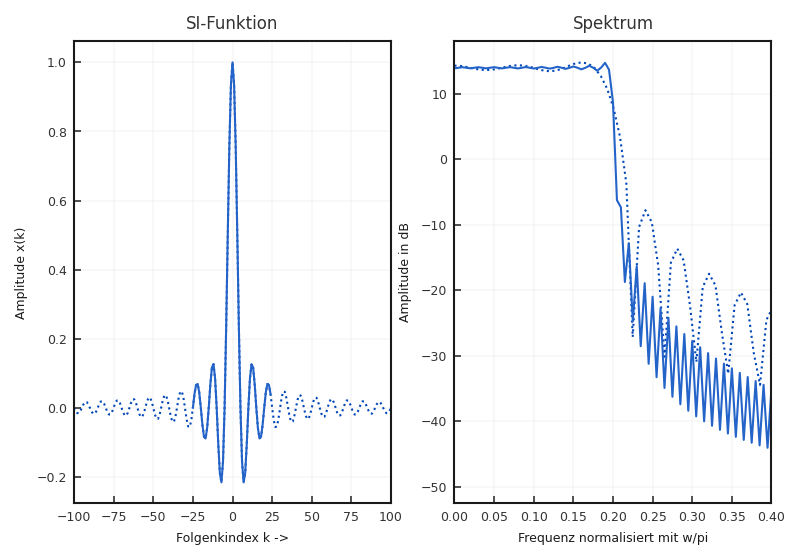

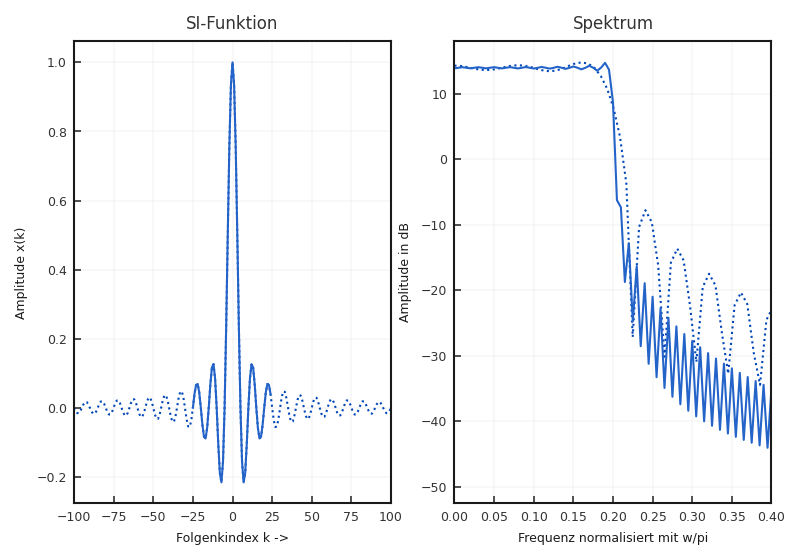

In [8]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   18.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

fig, (ax_si, ax_spec) = pyplot.subplots(1,2)

samples = numpy.linspace(-100, 100, 201)
si = [0]*len(samples)
mid = int(numpy.floor(len(samples)/2))

fs = 1000
f0 = 100

for idx in range(len(samples)):
    if (samples[idx]!=0):
        si[idx] = numpy.sin(2*numpy.pi * f0 * samples[idx]/fs)/(2*numpy.pi*samples[idx]*f0/fs)
    else:
        # si(0) = 1 to avoid division by zero
        si[idx] = 1

# cut si-function
si_short = si[(mid-25):(mid+25)]
samples_short = samples[(mid-25):(mid+25)]

#ax_si = pyplot.subplot(1, 2, 1)
ax_si.plot(samples, si, linestyle='dotted')
ax_si.plot(samples_short, si_short)
ax_si.set(xlabel='Folgenkindex k ->', ylabel='Amplitude x(k)', 
        title='SI-Funktion')
ax_si.set_xlim([-100, 100])

# zero padding, for display resolution
si_short = [0]*100 + si_short + [0]*100
si = [0]*100 + si + [0]*100

spectrum_short = numpy.fft.fft(si_short)
spectrum = numpy.fft.fft(si)

w = numpy.linspace(0, 2, len(si))
w_short = numpy.linspace(0, 2, len(si_short))

#ax_spec = pyplot.subplot(1, 2, 2)
ax_spec.plot(w_short, 20 * numpy.log10(abs(spectrum_short)), 
        linestyle='dotted')
ax_spec.plot(w, 20 * numpy.log10(abs(spectrum))) # dB spectrum
ax_spec.set(xlabel='Frequenz normalisiert mit w/pi', ylabel='Amplitude in dB', 
        title='Spektrum', xlim=([0, 0.4]))

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("GippsPheanomen", fig, display=False)

```{glue:figure} GippsPheanomen
:figwidth: 100%
:name: "fig:GibbsPheanomen"

Veranschaulichung des
Gibbs'schen Phänomens am Beispiel eines Tiefpassfilters.
```

Die Ursache hierfür ist in der Übertragungsfunktion des Rechteckfensters
zu suchen. Betrachtet man diese Funktion für die beiden betrachteten
Längen, so erkennt man die Konzenzentration der Überschwinger bei der
Frequenz Null. Die Höhe der Überschwinger bleibt aber identisch. Genau
dieses Verhalten wird durch die Faltung im Frequenzbereich auf die
Übertragungsfunktion des idealen Tiefpasses aufgeprägt. Man kann aber
zeigen, dass die Approximation im Sinne des kleinsten
Fehlerquadrates *Minimum Mean Square Error (MMSE)* über alle Frequenzen
optimal ist {cite}`KK98`.

Um die nicht-kausalen Anteile zu beseitigen ist zusätzlich noch eine
zeitliche Verschiebung der gefundenen Filterkoeffizienten notwendig.
Diese Verschiebung führt dann, wie man durch den Verschiebungssatz der
Fourier-Transformation sieht, zu einer linearen Phase des entworfenen
Tiefpasses.

Zur Vermeidung der Überschwinger (*Ripple*) können nun dieselben Techniken
verwendet werden, die auch die Spektralanalyse verbessert haben. Eine
Nutzung der dort vorgestellten Fensterfunktionen führt auf eine
geringere Ausprägung der Ripple, wobei gleichzeitig der Übergangsbereich
zwischen Durchgangs- und Sperrbereich zunimmt. Um das zu
veranschaulichen, ist in {numref}`Abbildung %s <fig:BspFensterEntwurf1>` 
der Entwurf eines Filters mit unterschiedlichen Fensterfunktionen gezeigt. 
Man erkennt deutlich, dass mit zunehmendem Übergangsbereich die Überschwinger 
abnehmen, wobei diese bei Nutzung der Fensterfunktionen nur noch im 
Sperrbereich deutlich zu erkennen sind.

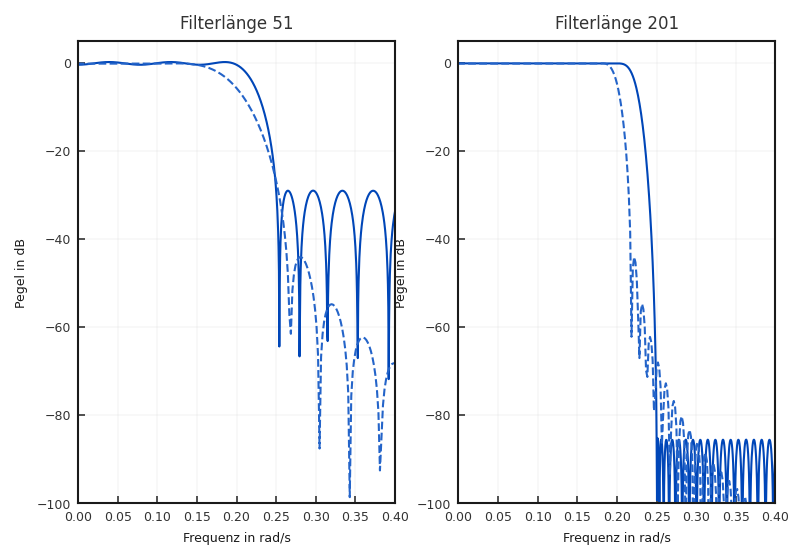

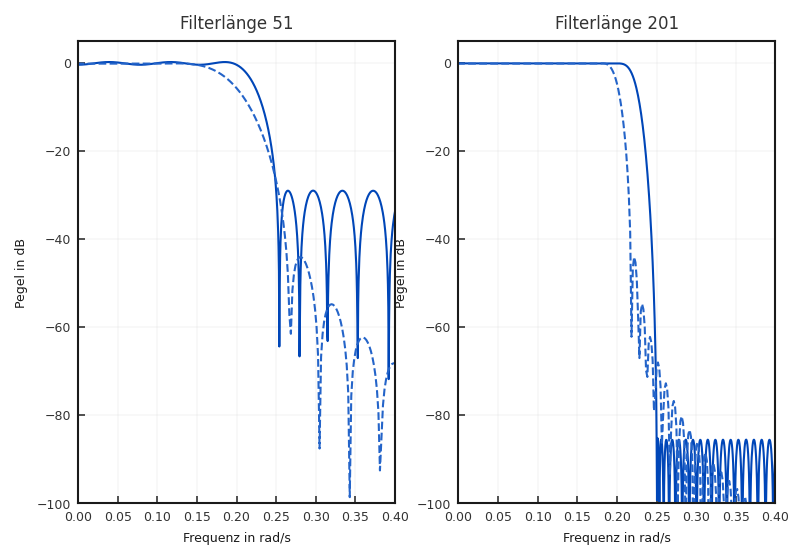

In [9]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   18.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from scipy import signal
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

fig, (ax_51, ax_201) = pyplot.subplots(1, 2)

eps = numpy.finfo(float).eps # for slight offset to avoid division by 0
f_s = 48000 
f_g = 4800 # Hz, cuttoff frequency

trans_width = 1200  # Hz, Width of transition from pass band to stop band

# filter length 51
N = 51      # Size of the FIR filter.
idxs = numpy.linspace(numpy.ceil(-N/2), numpy.floor(N/2), N)

# Remez filter design
taps = signal.remez(N, [0, f_g, f_g + trans_width, 0.5*f_s], [1, 0], Hz=f_s)
w, h = signal.freqz(taps, [1], worN=2000)
w = w/numpy.pi

# Von Hann filter design
w_rad = 2*numpy.pi*f_g/f_s # cutoff freq in rang od 0 -> 2*pi
# designing the filter
rect_window_51 = w_rad/numpy.pi * numpy.sin(w_rad*idxs+eps)/(w_rad*idxs+eps)
von_hann_window = [0]*N
for idx in range(N):
    von_hann_window[idx] = 0.5 - 0.5*numpy.cos(2*numpy.pi*idx/N)
window_51 = numpy.array(rect_window_51) * numpy.array(von_hann_window)
spectrum = numpy.fft.fft(numpy.concatenate((window_51, [0]*1000)))
mid = numpy.floor(len(spectrum)/2)
# shift area from pi -> 2pi to -pi -> 0
spectrum = numpy.concatenate([spectrum[int(mid):], spectrum[:int(mid)]]) 
# dB maximum = 0dB
spectrum_abs = 20*numpy.log10(numpy.abs(spectrum)/numpy.abs(spectrum).max()) 
freqs_fft = numpy.linspace(-1, 1, len(spectrum_abs)) # freq bins, for plotting

ax_51.plot(w, 20*numpy.log10(numpy.abs(h)))
ax_51.plot(freqs_fft, spectrum_abs, linestyle='--')
ax_51.set(xlabel='Frequenz in rad/s', ylabel='Pegel in dB', xlim=[0, 0.4], 
        ylim=[-100, 5], title='Filterlänge 51')

# filter length 201
# -----------------
N = 201     # Size of the FIR filter.
idxs = numpy.linspace(numpy.ceil(-N/2), numpy.floor(N/2), N)

taps = signal.remez(N, [0, f_g, f_g + trans_width, 0.5*f_s], [1, 0], Hz=f_s)
w, h = signal.freqz(taps, [1], worN=2000)
w = w/numpy.pi
# Von Hann
w_rad = 2*numpy.pi*f_g/f_s # cutoff freq in rang od 0 -> 2*p
# designing the filter
rect_window_51 = w_rad/numpy.pi * numpy.sin(w_rad*idxs+eps)/(w_rad*idxs+eps)
von_hann_window = [0]*N
for idx in range(N):
    von_hann_window[idx] = 0.5 - 0.5*numpy.cos(2*numpy.pi*idx/N)
window_201 = numpy.array(rect_window_51) * numpy.array(von_hann_window)
spectrum = numpy.fft.fft(numpy.concatenate((window_201, [0]*1000)))
mid = numpy.floor(len(spectrum)/2)
# shift area from pi -> 2pi to -pi -> 0
spectrum = numpy.concatenate([spectrum[int(mid):], spectrum[:int(mid)]]) 
# dB maximum = 0dB
spectrum_abs = 20*numpy.log10(numpy.abs(spectrum)/numpy.abs(spectrum).max()) 
freqs_fft = numpy.linspace(-1, 1, len(spectrum_abs)) # freq bins, for plotting


ax_201.plot(w, 20*numpy.log10(numpy.abs(h)))
ax_201.plot(freqs_fft, spectrum_abs, linestyle='--')
ax_201.set(xlabel='Frequenz in rad/s', ylabel='Pegel in dB', xlim=[0, 0.4], 
        ylim=[-100, 5], title='Filterlänge 201')

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("BspFensterEntwurf", fig, display=False)

```{glue:figure} BspFensterEntwurf
:figwidth: 100%
:name: "fig:BspFensterEntwurf1"

Beispiel eines Tiefpass-Entwurfes mit
Rechteck und Hann-Fenster unterschiedlicher 
Länge. $f_\text{g} = \Omega_\text{g} = 0{,}2\pi$.
```

#### Parks-McClellan

Im letzten Abschnitt wurde eine optimale Lösung vorgestellt, die den
mittleren Fehler über das Gesamtspektrum minimiert. Dabei hat sich aber
der Fehler an der Übergangsstelle konzentriert. Eine weitere optimale
Lösung ist, den Fehler über alle Frequenzen gleich zu verteilen. Die
verbleibende Fehlergröße ist dabei nur von der gewählten Ordnung des
Filters abhängig. Zur Lösung dieses Problems wurde von Parks und
McClellan der sog. Remez-Algorithmus entwickelt, der zur optimalen
Lösung konvergiert. Der Restfehler ist dabei minimal für alle
Frequenzen. Diese Minimierung des maximalen Fehlers wird auch als
Tschebyscheff-Lösung bezeichnet.

Um die Lösung zu verdeutlichen und die Unterschiede zur Fenster-Methode
heraus zu arbeiten, ist in {numref}`Abbildung %s <fig:BspFensterRemez>`  
ein Entwurf eines Tiefpass-Filters
mittels Remez-Entwurfsverfahren und mittels Fenster-Entwurfs mit
Hann-Fenster gegenüber gestellt. Wir erkennen, dass bei gleicher Ordnung
das Remez-Verfahren eine insgesamt bessere Sperrdämpfung aufweist. 
Dies bedeutet im Umkehrschluss, dass bei einer im Entwurf
spezifizierten Sperrdämpfung die Ordnung des resultierenden Filters beim
Remez-Verfahren deutlich kleiner ist. Für die konkrete Realisierung
bedeutet dies eine deutliche Aufwandsreduktion.

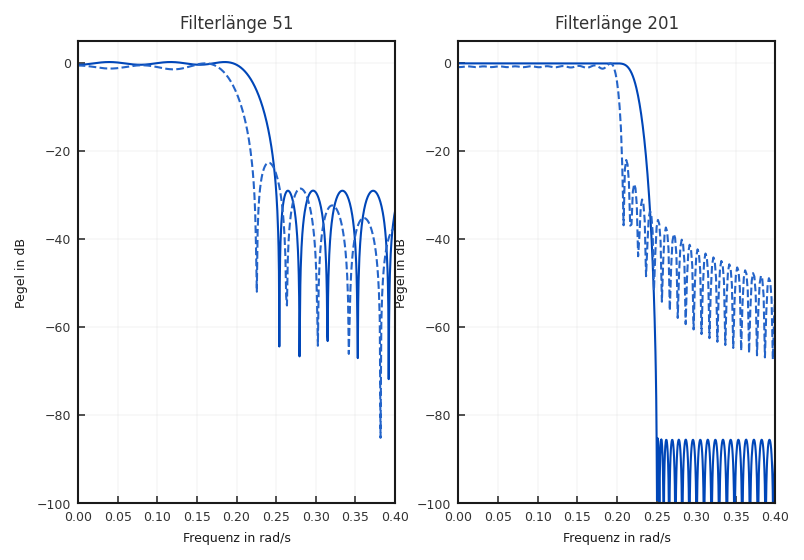

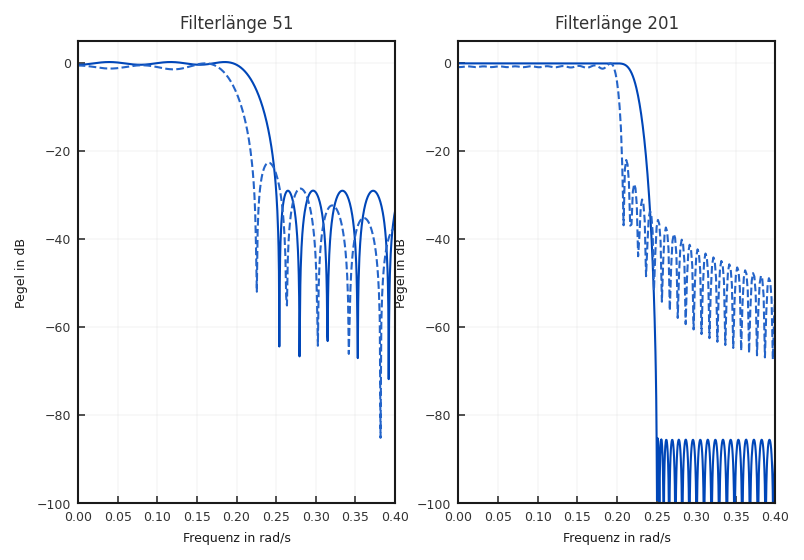

In [10]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   18.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from scipy import signal
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

fig, (ax_51, ax_201) = pyplot.subplots(1, 2)
eps = numpy.finfo(float).eps # for slight offset to avoid division by 0
f_s = 48000
f_g = 4800 # cutoff frequency


trans_width = 1200  # Hz, Width of transition from pass band to stop band

# filter length 51
# ----------------
N = 51 # Size of the FIR filter.
idxs = numpy.linspace(numpy.ceil(-N/2), numpy.floor(N/2), N)

# Remez filter design
taps = signal.remez(N, [0, f_g, f_g + trans_width, 0.5*f_s], [1, 0], Hz=f_s)
w, h = signal.freqz(taps, [1], worN=2000)
w = w/numpy.pi

# boxcar window filter design
w_rad = 2*numpy.pi*f_g/f_s # cutoff freq in rang od 0 -> 2*pi
# designing the filter
rect_window_51 = w_rad/numpy.pi * numpy.sin(w_rad*idxs+eps)/(w_rad*idxs+eps)
spectrum = numpy.fft.fft(rect_window_51, n=2000)
mid = numpy.floor(len(spectrum)/2)
# shift area from pi -> 2pi to -pi -> 0
spectrum = numpy.concatenate([spectrum[int(mid):], spectrum[:int(mid)]]) 
# dB maximum = 0dB
spectrum_abs = 20*numpy.log10(numpy.abs(spectrum)/numpy.abs(spectrum).max()) 
freqs_fft = numpy.linspace(-1, 1, len(spectrum_abs)) # freq bins, for plotting

ax_51.plot(w, 20*numpy.log10(numpy.abs(h)))
ax_51.plot(freqs_fft, spectrum_abs, linestyle='--')
ax_51.set(xlabel='Frequenz in rad/s', ylabel='Pegel in dB', xlim=[0, 0.4], 
        ylim=[-100, 5], title='Filterlänge 51')

# filter length 201
# -----------------
N = 201 # Size of the FIR filter
idxs = numpy.linspace(numpy.ceil(-N/2), numpy.floor(N/2), N)

# Remez filter design
taps = signal.remez(N, [0, f_g, f_g + trans_width, 0.5*f_s], [1, 0], Hz=f_s)
w, h = signal.freqz(taps, [1], worN=2000)
w = w/numpy.pi

# boxcar window filter design
w_rad = 2*numpy.pi*f_g/f_s # cutoff freq in rang od 0 -> 2*pi
# designing the filter
rect_window_201 = w_rad/numpy.pi * numpy.sin(w_rad*idxs+eps)/(w_rad*idxs+eps)
spectrum = numpy.fft.fft(numpy.concatenate((rect_window_201, [0]*1000)))
mid = numpy.floor(len(spectrum)/2)
# shift area from pi -> 2pi to -pi -> 0
spectrum = numpy.concatenate([spectrum[int(mid):], spectrum[:int(mid)]]) 
# dB maximum = 0dB
spectrum_abs = 20*numpy.log10(numpy.abs(spectrum)/numpy.abs(spectrum).max()) 
freqs_fft = numpy.linspace(-1, 1, len(spectrum_abs)) # freq bins, for plotting


ax_201.plot(w, 20*numpy.log10(numpy.abs(h)))
ax_201.plot(freqs_fft, spectrum_abs, linestyle='--')
ax_201.set(xlabel='Frequenz in rad/s', ylabel='Pegel in dB', xlim=[0, 0.4], 
        ylim=[-100, 5], title='Filterlänge 201')

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("BspFensterRemez", fig, display=False)

`````{tab-set}
````{tab-item} Entwurf
Fenster Entwurf
```{glue:figure} BspFensterEntwurf
:figwidth: 100%
:name: "fig:BspFensterEntwurf2"
Beispiel eines Tiefpass-Entwurfes mit
Rechteck und Hann-Fenster unterschiedlicher Länge. 
$f_\text{g} = \Omega_\text{g} = 0{,}2\pi$.
```
````

````{tab-item} Remez
Remez Fenster
```{glue:figure} BspFensterRemez
:figwidth: 100%
:name: "fig:BspFensterRemez"
Beispiel eines Tiefpass-Entwurfes mit dem
Remez-Algorithmus und der Fenster-Methode unterschiedlicher Länge.
$f_\text{g} = \Omega_\text{g} = 0{,}2\pi$.
```
````
`````

```{admonition} To Do
:class: error
Aufzeigen der Fenstermethode für allgemeine Übertragungsfunktionen, Design im Frequenzbereich, IFFT und dann Ausschneiden, je nach Ordnung
```

#### Linearphasige Filter

Linearphasigkeit ist eine interessante Eigenschaft in der
Nachrichtentechnik, da mit Ihrer Hilfe ein Signal gefiltert werden kann,
ohne weitere Phasenverzerrungen einzuführen. Weiterhin führt die
Linearphasigkeit dazu, dass alle Frequenzanteile des Signals um einen
konstanten Betrag verzögert werden. Diese Verzögerung wird als
Gruppenlaufzeit bezeichnet und ist über 

$$
    \tau_\text{g}(e^{(j \Omega)}) = - \frac{\delta \arg\{H(e^{(j \Omega)})\}}{\delta \Omega}
$$ (eq:Def:Gruppenlaufzeit)

als Ableitung der Phase zur Frequenz definiert.

Wir haben bereits für das einfache Filter mit der Impulsantwort
$h(k) = [1\:\: 1]$ festgestellt, dass es sich um einen Tiefpass mit
linearer Phase handelt. Diese Eigenschaft beruht drauf, dass die
Nullstellen dieses FIR-Systems nur auf dem Einheitskreis liegen.
Zusätzlich sind aber auch alle Systeme linearphasig die am Einheitskreis
gespiegelte Nullstellen aufweisen. Es muss also gelten, dass zu jeder
Nullstelle $z_i$ die nicht auf dem Einheitskreis liegt eine weitere
Nullstelle mit $z_{\ell} = 1/z_i$ existiert.

Diese Symmetrie in der Pol-Nullstellenebene führt zu bestimmten
Eigenschaften bei den Koeffizienten. Man kann zeigen, dass 4
verschiedene Möglichkeiten existieren, linearphasige FIR-Filter zu
realisieren {cite}`KK98`. Diese unterscheiden sich darin, ob die Ordnung
gerade oder ungerade ist und ob die Koeffizienten zur Mitte des Filters
achsen- oder punktsymmetrisch sind. Daraus ergeben sich folgende
Abhängigkeiten:

```{figure} ../images/psFilt/LinPhaseTypen.png
---
width: 100%
name: fig:LinPhaseTypen
```

Aus diesen vier Symmetrieanordnungen resultieren einige Eigenschaften
für die Übertragungsfunktion. Nur mit einem Filter Typ I lassen sich
alle Grundfiltercharakteristika erzeugen. Bei den anderen Typen ergeben
sich feste Werte für bestimmte Punkte der Übertragungsfunktion. So ist
für den Typ II immer eine Nullstelle bei $\Omega = 0$ und
$\Omega = \pi$, während der Typ III immer eine Nullstelle bei
$\Omega = \pm \pi$ besitzt. Typ IV dagegen hat immer eine Nullstelle bei
$\Omega = 0$

Dies hat natürlich Konsequenzen für den Entwurf von linearphasigen
FIR-Filtern. So sollte man nie versuchen einen Hochpass zu entwerfen und
gleichzeitig Typ II oder Typ III verwenden wollen. Das heißt, man sollte
darauf achten, ob das gewünschte Filterverhalten, auch mit dem
Entwurfsvorgaben zusammen passen.

#### Minimalphasige FIR-Filter

Eine weitere besondere Klasse an FIR-Filtern sind sogenannte
minimalphasige Filter. Das heisst, dieses Filter realisiert eine
bestimmte Betragsübertragungsfunktion mit der minimalen Phase.  
Es zeigt sich dass sich dieser Filtertyp genau dann ergibt, wenn alle Nullstellen
innerhalb der Einheitskreises liegen. Eine Realisierung ist also entweder
über ein Berechnen aller Nullstellen und deren Spiegelung am
Einheitskreis möglich, da sich so nur die Phase aber nicht das
Betragsverhalten ändert. Die Zerlegung von Filtern sehr hoher
Ordnung ist numerisch aufwändig und durch mögliche
Rundungsfehler nicht immer stabil.  

Eine andere Methode nutzt die besondere Eigenschaft
minimalphasiger Filter, dass es eine direkte Verknüpfung zwischen dem
Betrag und der Phase gibt. Hierzu wird die sog. Hilbert-Transformation
verwendet, die aber erst in einem späteren Abschnitt intensiver
eingeführt wird. An dieser Stelle soll ein Vorstellen des Designalgorithmus 
genügen, um eine beliebige Betragsübertragungsfunktion
(meist linearphasig, siehe Entwurfsmethoden) in einen minimalphasigen
Entwurf zu überführen.  

Gehen wir davon aus, dass die Betragsübertragungsfunktion $|H(e^{(j \Omega)})|$ bekannt ist. 
Eine Logarithmierung dieses Spektrums ist möglich, so lange keine echte Nullstelle vorhanden
ist, dies kann durch eine untere Schwelle gewährleistet werden. Dieses
neue logarithmierte Spektrum wird mit Hilfe einer
IDFT in den Zeitbereich transformiert. Da es sich um eine reelle gerade Funktion handelt,
ergibt sich auch wieder eine reelle gerade Funktion. Diese
Zeitbereichslösung wird nun so verändert, dass alle negativen Zeiten
(oder positive Zeiten oberhalb von N/2, durch die Zirkulareigenschaft
der DFT ist das gleichwertig) zu Null gesetzt und alle anderen
Werte mit zwei multipliziert werden. Diese neue Funktion wird nun mit
der FFT erneut in den Frequenzbereich transformiert. Um die
Logarithmierung rückgängig zu machen wird für jeden Frequenzpunkt die
Exponenten-Funktion angewendet. Eine erneute IFFT der resultierenden
Funktion führt auf die Filterkoeffizienten, die das minimalphasige
Filter repräsentieren. {numref}`Abbildung %s <fig:MinPhasenBsp>`  zeigt die Ergebnisse für einen
einfaches Filter achter Ordnung bei vorgegebenem
Betragsübertragungsverhalten.

/home/bitzer/SoftDev/Python/virtEnv/SE/lib/python3.10/site-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/home/bitzer/SoftDev/Python/virtEnv/SE/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


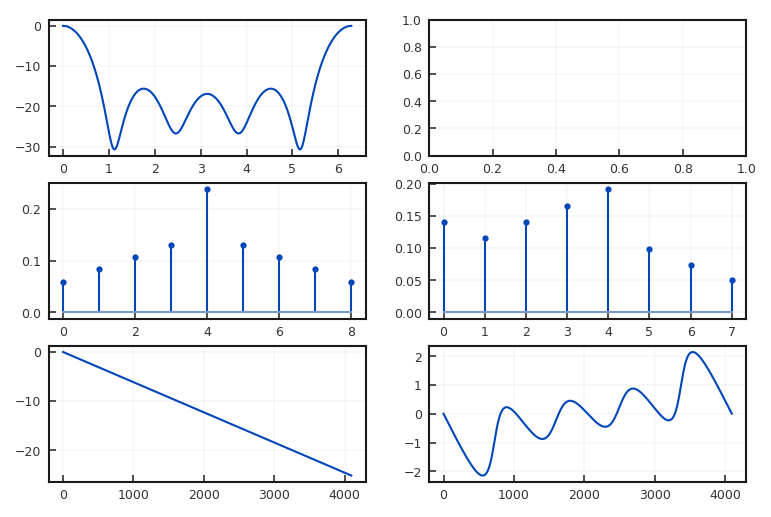

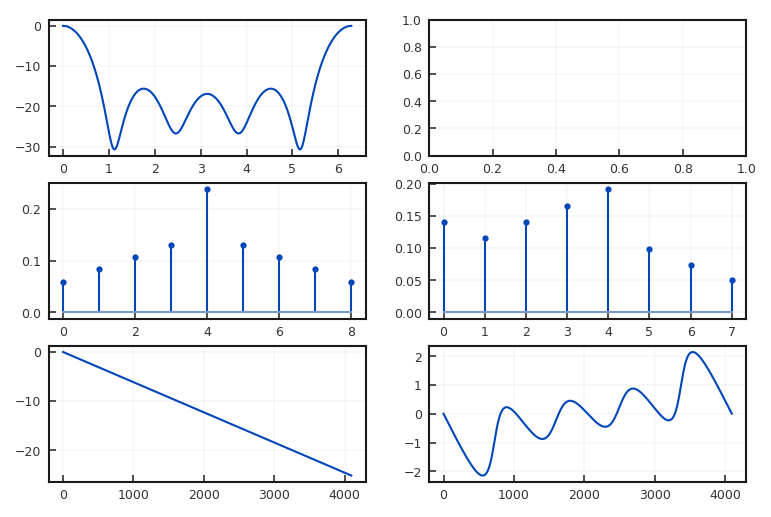

In [11]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   18.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from scipy import signal
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

eps = numpy.finfo(float).eps # for slight offset to avoid division by 0

# create exemplary non-recursive filter coefficients (mirrored at unit circle)
b1 = [0.98]*4
b2 = [1.0/0.98]*4
h = numpy.poly(numpy.concatenate((b1, b2)))
h = [0.5, 0.7, 0.9, 1.1, 2, 1.1, 0.9, 0.7, 0.5]
h = numpy.array(h)/numpy.sum(h)
W, H = signal.freqz(b=h, a=1, worN=4*1024, whole=True)
fig, ((ax_H, ax_void), (ax_lin_zeit, ax_min_zeit), 
        (ax_lin_phase, ax_min_phase)) = pyplot.subplots(3, 2)

# create a linear phase filter from the exististing impulse response
log_H = numpy.log(numpy.abs(H)+eps)
h_c = numpy.fft.ifft(log_H).real
h_c[1 : int(len(h_c)/2)] *= 2
h_c[int(len(h_c)/2)+1 : ] = 0 
H_min_log = numpy.fft.fft(h_c)
H_min = numpy.exp(H_min_log)
h_min = numpy.fft.ifft(H_min)
h_min = h_min[0:8]

ax_H.plot(W, 20*numpy.log10(numpy.abs(H)+eps))
ax_lin_zeit.stem(h, use_line_collection=True)
ax_min_zeit.stem(h_min, use_line_collection=True)
ax_lin_phase.plot(numpy.unwrap(p=numpy.angle(H)))
ax_min_phase.plot(numpy.unwrap(p=numpy.angle(H_min)))

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("MinPhasenBsp", fig, display=False)

```{glue:figure} MinPhasenBsp
:figwidth: 100%
:name: "fig:MinPhasenBsp"

Entwurf eines Filters mit gegebener
Betragsübertragungsfunktion. a) als linearphasiges Filter und b) als
minimalphasiges
Filter.
```

Eine mögliche Matlab- bzw. Python-Implementierung sieht folgendermaßen aus:

`````{tab-set}
````{tab-item} Matlab
```matlab
    %v_H contains the magnitude vector of the desired filter
    log_H = log(v_H+eps); % eps is the smallest positive number in matlab
                          % prevents log of zero
    h_ceps = real(ifft(log_H)); % real for removing quantization error
    h_ceps(2:length(h_ceps)/2) = 2*h_ceps(2:length(h_ceps)/2);
    h_ceps(length(h_ceps)/2+1:end) = 0; % Setting to zero
    H_min_log = fft(h_ceps);
    H_min = exp(H_min_log);
    v_h = real(ifft(H_min));
```
````
````{tab-item} Python
```python
    import numpy
    #v_H contains the magnitude vector of the desired filter
    
    eps = numpy.finfo(float).eps # eps is the smallest positive in python 
    log_H = numpy.log(numpy.abs(H)+eps) # eps prevents log of zero
    h_c = numpy.fft.ifft(log_H).real # real for removing quantization error
    h_c[1 : int(len(h_c)/2)] *= 2
    h_c[int(len(h_c)/2)+1 : ] = 0 # Setting to zero
    H_min_log = numpy.fft.fft(h_c)
    H_min = numpy.exp(H_min_log)
    h_min = numpy.fft.ifft(H_min)
```
````
`````

### IIR-Filter

Im Gegensatz zu den FIR-Filtern haben IIR-Filter auch rekursive Anteile.
Die Implementierung ist durch das Stabilitätsproblem sehr viel
schwieriger. Gleichzeitig können sehr unterschiedliche Strukturen
verwendet werden, die alle unterschiedliche Eigenschaften haben.

#### Beschreibung als Blockdiagramm

Die Grundform des Blockdiagramms eines IIR-Filters ist in {numref}`Abbildung %s <fig:IIR_allgemeinBlock>`  gezeigt.

```{figure} ../images/psFilt/IIR_allgemeinBlock.png
---
width: 80%
name: fig:IIR_allgemeinBlock
---
IIR-Filter Struktur in Direkt Form I.
```

Diese sehr grundlegende Struktur, die die Differenzengleichung
geradlinig umsetzt wird als Direkt Form I bezeichnet. Sie ist einfach gängigen Programmiersprachen 
umzusetzen. Problematisch ist aber, dass bei einer
höheren Ordnung $N>8$ numerische Probleme auftreten, da bei vielen
Filterentwürfen Filterkoeffizienten herauskommen, die im Zahlenbereich
weit auseinander liegen und schlecht gleichzeitig in einem quantisierten
Datenformat repräsentiert werden können.

Um dies zu vermeiden, wird im allgemeinen eine Zerlegung von Filtern
höherer Ordnung in Filter 2. Ordnung vorgenommen. Diese werden dann
*Second Order Sections* oder *Biquads* genannt. Eine kaskadierte
Schaltung führt dann abschließend wieder zum Originaldesign, ohne die
numerischen Schwierigkeiten zu beinhalten (siehe {numref}`Abbildung %s <fig:IIR_SOS_Zrlegung>`).

```{figure} ../images/psFilt/IIR_SOS_Zrlegung.png
---
width: 80%
name: fig:IIR_SOS_Zrlegung
---
Beispiel einer SOS-Zerlegung eines IIR-Filters
6.Ordnung.
```

Mathematisch lässt sich die Zerlegung folgendermaßen darstellen:

$$
\begin{aligned}
    H(z) &=& \frac{b_0 + b_1 z^{-1} +  b_2 z^{-2} + \cdots +  b_{N-1} z^{-(N-1)}}
                  {1 + a_1 z^{-1} +  a_2 z^{-2} + \cdots +  a_{N-1} z^{-(N-1)}} \\
         & = & \frac{b_{0_1} + b_{1_1} z^{-1} +  b_{2_1} z^{-2} }{1 + a_{1_1} z^{-1} + a_{2_1} z^{-2}}
         \frac{b_{0_2} + b_{1_2} z^{-1} +  b_{2_2} z^{-2} }{1 + a_{1_2} z^{-1} + a_{2_2} z^{-2}}  \cdots
         \frac{b_{0_N} + b_{1_N} z^{-1} +  b_{2_N} z^{-2} }{1 + a_{1_N} z^{-1} + a_{2_N} z^{-2}}\end{aligned}
$$ (eq:SOS:Zerlegung)

Die Zusammenführung zweier Pole und Nullstellen sollte dabei immer so
erfolgen, dass die Pole und Nullstellen möglichst dicht beieinander
liegen (siehe {numref}`Abbildung %s <fig:Zp2sos>` ).

```{figure} ../images/psFilt/Zp2sos.png
---
width: 80%
name: fig:Zp2sos
---
Pol-Nullstellenzuordnung eines Filters
6.Ordnung zu drei Second Order
Sections.
```

#### Filterstrukturen für SOS

Die Direkt Form I ist nicht die einzige Möglichkeit ein IIR-Filter zu
realisieren. Um die anderen Strukturen zu verdeutlichen, konzentrieren
wir uns auf die wichtigen SOS-Filter. Eine wichtige Anforderung an
Realisierungen spielen die Anzahl der Multiplikationen und die Anzahl
der benötigten Speicherplätze. Zusätzlich muss noch auf das numerische
Verhalten bei einer quantisierten Datendarstellung geachtet werden. Den
letzten Punkt werden wir zunächst nicht behandeln.

Eine Analyse der DF1 zeigt, dass wir fünf Multiplikationen und vier
Speicherplätze benötigen. Durch Umstellen des Blockdiagramms lässt sich
erkennen, dass es möglich ist die Speicher für den Transversal- und für
den Rückführungszweig zusammen zu legen (siehe {numref}`Abbildung %s <fig:DF1_to_DF2>` ). Diese Umstellung ist erlaubt, da wir
zum einen den Transversal- und den Rückführungszweig als zwei getrennte
Systeme auffassen können, zum anderen da beide Einzelsysteme LTI-Systeme
sind und somit das Vertauschen keinen Einfluss auf das
Übertragungsverhalten hat. Die jetzt parallel liegenden Speicherelemente
können in einem abschließenden Schritt zusammen gefasst werden. Es
ergibt sich die sogenannte Direkt-Form II mit einer minimalen Anzahl von
zwei Speicherelementen. Strukturen mit minimaler Anzahl an
Speicherelementen werden kanonisch genannt.

```{figure} ../images/psFilt/DF1_to_DF2.png
---
width: 100%
name: fig:DF1_to_DF2
---
Umwandlung einer DF1 Struktur in die
kanonische DF2 Struktur. Die grau hinterlegten Verzögerungselemente
können zu einem Element zusammen gefasst werden, da sie jeweils dasselbe
Signal als Eingang haben.
```

#### Vom Blockdiagramm zur Übertragungsfunktion

```{admonition} To Do
:class: error
Analyse des Block-Diagramms mit z-Trafo daraus folgend die Übertragungsfunktion , ??Wie geht es anders herum??
```

### IIR-Filterdesign

Um die Theorie des Entwurfs traditioneller IIR-Filter genauer zu
erläutern fehlen an dieser Stelle noch einige theoretische Konzepte. {numref}`Abschnitt %s <sec:IIR-Filterdesign>` gibt alleridngs einen ersten Einblick in Entwurfsverfahren von IIR-Filtern auf Basis von Matlab.

Mit den bisherigen Erkenntnissen sind aber schon Lösungen für einige
spezielle Filter möglich.

#### Notch-Filter

```{admonition} To Do
:class: error
Entwurf in z-Ebene durch Nullstellen auf dem Einheitskreis und Polstellen mit verringertem Radius und gleichem Winkel, Anwendungen bzw. Design Bsp.: DC Filter, Netzbrummﬁlter
```

#### Allpässe

```{admonition} To Do
:class: error
Wiederholung spezielles Pol-Nullstellendiagramm, Überlegungen zum Entwurf im z-Bereich, Anwendungen: Spezielle Filter
```

## Implementierungsaspekte

### FIR-Filter

#### Schnelle Faltung OLA

Das Hauptproblem der FIR-Filter ist das beim Entwurf meist sehr hohe
Filterordnungen mit mehr als 100 Koeffizienten herauskommen. Dies führt
zu einer sehr hohen Rechenleistung, wenn man versucht solche Filter
direkt durch die Faltungssumme zu realisieren. Statt dessen kann eine
FFT basierte schnelle Faltung aufgebaut werden, die eine sehr viel
recheneffizientere Version ermöglicht.

Wir hatten im Abschnitt {numref}`Abschnitt %s <sec:DFT:Faltung>` gesehen, dass bei der Faltung mit Hilfe
der FFT unbedingt genügend Nullen angefügt werden müssen, um die
zirkulare Faltung zu verhindern. Für den Fall, dass die beiden Folgen
eine sehr unterschiedliche Länge haben und dies ist der Normalfall
kommen weitere Probleme hinzu. Zum einen müssen riesige Speicherblöcke
angelegt werden, um die Signale zu speichern und zum anderen kann die
Berechnung erst statt finden, wenn alle Werte eingelesen sind. Da die
FFT Größen zusätzlich auch noch für die Multiplikation der beiden
Spektren gleich lang sein müssen, bedeutet dies auch, dass man sehr
viele unnötig angehängte Nullen des Koeffizientenvektors ebenfalls
transformieren muss.

Zur Lösung dieses Problems wird die Linearität der FFT ausgenutzt. Es
ist möglich das Eingangssignal in kleinere Blöcke zu zerlegen, die so
lang gewählt werden, dass sie zu der Anzahl der Filterkoeffizienten
passt. Diese kleineren Blöcke werden mit Nullen so verlängert, dass die
zirkulare Faltung verhindert wird. Nimmt man an, dass das Filter die
Ordnung $M$ hat und die Zerlegung der Eingangsfolge in Blöcken der Länge
$L$ vorgenommen wird, so ergibt sich die Länge der Ausgangsfolge[^3] als
$L+M$. Möchte man dieses Ergebnis mit Hilfe der FFT erreichen, muss also
der Eingangsblock um $M$ Nullen erweitert werden (*Zero-Padding*). Die
benötigte FFT-Größe ergibt sich dann aus der folgenden Zweier-Potenz von
$L+M$. Das Ergebnis der Multiplikation der Spektren des Filters mit dem
der Eingangsfolge wird anschließend in den Zeitbereich zurück
transformiert. Dabei entsteht eine Zeitfolge der Länge $L+M$. Um nun für
eine in Blöcken zerlegte Eingangsfolge genau das Ausgangssignal einer
direkten Faltung zu erhalten, muss nun das Ausgangssignal des nächsten
Blockes zu den $M$ überhängenden Ausgangswerten hinzu addiert werden. Da
es sich hierbei um eine Überlappung handelt, wird dieses Verfahren als
*Overlap-Add* (OLA) bezeichnet. Zur Verdeutlichung ist der gesamte
Aufbau auch noch in {numref}`Abbildung %s <fig:OLA_Erklaerung>` gezeigt.

```{figure} ../images/psFilt/OLA_Erklaerung.png
---
width: 50%
name: fig:OLA_Erklaerung
---
Overlap-Add Verfahren am Beispiel mit $M = 3$
und $L = 13$.
```

Dieses Prinzip kann zusätzlich auch für sehr lange Impulsantworten, wie
sie bei raumakustischen Messungen vorkommen nützlich sein. In diesem
Fall wird nicht nur das Eingangssignal, sondern auch die Impulsantwort
in kleine Blöcke zerlegt. Durch eine geeignete Struktur mit
Verzögerungen der einzelnen Spektren lässt sich so eine schnelle Faltung
mit einer kurzen Latenz (Durchlaufzeit) erzeugen. Dieses Verfahren wird
Block Partitionierte OLA genannt und ist insbesondere zur Realisierung
von Faltungshallalgorithmen in kommerziellen Produkten erhältlich.

#### C/C++

Um die Umsetzung auf programmierbaren Systemen zu erläutern, werden im
weiteren Verlauf hauptsächlich Beispiele in C/C++ bzw. Matlab verwendet.

Eine direkte C-Implementierung der Hauptroutine des FIR-Filters ist
durch den folgendes Programm gegeben. Wir gehen davon aus, dass der
Speicher für die vergangenen Werte und die Koeffizienten ordnungsgemäß
allokiert wurden. Als Eingangssignal wird ein Block von Samples
angenommen, der in In gespeichert ist.
```c++
    for(kk = 0 ; kk < LenOfInput ; kk++)
    {
        // Zuweisung des Aktuellen Samples
        bStates[0] = In[kk];

        // Berechnung der Summe (Zum besseren Vergleich
        // mit zweiter Methode, erster Koeffizient separat)
        Out[kk] = bCoeffs[0] * bStates[0];

        int nn;
        for (nn = 1 ; nn < LenOfFilter ; nn++)
        {
            Out[kk] += bCoeffs[nn] * bStates[nn];
        }
        // Verschieben der States
        // muss von hinten nach vorne erfolgen, damit der Speicher
        // nicht ueberschrieben wird
        for (nn = LenOfFilter-1 ; nn > 0 ; nn--)
        {
            bStates[nn] = bStates[nn-1];
        }
    }
```
Diese Version kann durch eine sehr viel schnellere Lösung ersetzt
werden, wenn das Konzept des Ringspeichers eingeführt wird, den es zwar
bei spezialisierten digitalen Signal Prozessoren (DSP) gibt, der aber in
allgemeineren Rechnerarchitekturen (PC) nicht direkt vorkommt. Es ist
aber möglich eine Simulation dieses Speichers aufzubauen, um so eine
effizientere Implementierung zu ermöglichen.

Das Konzept des Ringspeichers geht davon aus, dass Speicher nicht linear
sondern zirkular aufgebaut ist. Dies wird in DSPs durch eine spezielle
Modulo-Adressierung erreicht. {numref}`Abbildung %s <fig:RingspeicherMemeory>` zeigt, wie man sich diesem Speicher
vorstellen kann. Ein neuer Datenwert wird immer an die Adresse
geschrieben, auf die der rotierende Zeiger zeigt.

```{figure} ../images/psFilt/RingspeicherMemeory.png
---
width: 30%
name: fig:RingspeicherMemeory
---
Schematische Darstellung eines
Ringspeichers mit rotierndem
Adresszeiger
```

Eine Realiserung in C würde den Sprung am Übergang von $x(N-1)$ auf
$x(0)$ durch eine if-Abfrage lösen. Diese Art der Implementierung
ermöglicht es ein FIR-Filter aufzubauen, dass ohne Speicherverschiebung
auskommt.
```c++
    int ActPosStates = 0;
    int nn;
    for(kk = 0 ; kk < LenOfInput ; kk++)
    {
        // Zuweisung des Aktuellen Samples
        bStates[ActPosStates] = In[kk];

        // Zuweisung des ersten Coeffs
        Out[kk] = bCoeffs[0] * bStates[ActPosStates];

        for (nn = 1 ; nn < LenOfFilter ; nn++)
        {
            ActPosStates--; // States zaehlen runter
            if (ActPosStates<0) // Falls Grenze erreicht
                ActPosStates+=LenOfFilter;  // Sprung ans Ende
            Out[kk] += bCoeffs[nn] * bStates[ActPosStates]; // Summe
        }
    }
```
Diese Lösung kann noch weiter optimiert werden, in dem der Sprung des
Filters vorher berechnet wird. Die if-Abfrage kann somit ebenfalls aus
der Schleife entfernt werden. Zusätzlich ist es noch nützlich
pre-increment zu verwenden, da dies schneller abgearbeitet werden kann
(Bartning-Script).

Der optimierte Code eines FIR-Filters lautet also.
```c++
    int ActPosStates = 0;
    int nn;
    int Jump;

    for(kk = 0 ; kk < LenOfInput ; ++kk)
    {
        // Zuweisung des Aktuellen Samples
        bStates[ActPosStates] = In[kk];

        // Zuweisung des ersten Coeffs
        Out[kk] = 0;

        Jump = ActPosStates; // Jump Point

        for (nn = 0 ; nn <= Jump ; ++nn) //preincrement is faster
        {
            Out[kk] += bCoeffs[nn] * bStates[ActPosStates]; // Summe
            --ActPosStates; // States zaehlen runter
        }

        ActPosStates+=LenOfFilter;  // Sprung ans Ende

        Jump++;

        for (nn = Jump ; nn < LenOfFilter ; ++nn) //preincrement is faster
        {
            Out[kk] += bCoeffs[nn] * bStates[ActPosStates]; // Summe
            --ActPosStates; // States zaehlen runter
        }

        ActPosStates++;

        if (ActPosStates==LenOfFilter)
            ActPosStates -= LenOfFilter;

    }
```
Welche der beiden letzten Versionen schneller ist, hängt vom
Prozessortyp, von der Filterlänge und vom Compiler ab. Es hilft also
beim Entwickeln von zeitkritischen Routinen immer nur der wirkliche
Benchmark-Test unter realistischen Bedingungen.

#### Vektorielle Schreibweise und Implementierung (Matlab)

Häufig ist es nützlich, Signale als Vektoren aufzufassen, da durch die
Vektor und Matrix-Schreibweise bestimmte Rechenregeln und Eigenschaften
der linearen Algebra direkt für Signale nutzbar sind. Als Schreibweise
werden meist fettgedruckte Buchstaben verwendet. Typischerweise werden
Zeitsignale als Spaltenvektoren eingeführt.

Beispiel eines Vektors mit vier vergangenen Zeitwerten

$$
    \mathbf{x}(k) = \left(%
\begin{array}{c}
  x(k) \\
  x(k-1) \\
  x(k-2) \\
  x(k-3) \\
\end{array}%
\right)
$$ (eq:DefSpaltenvektor)

Führen wir nun in der selben Art einen Vektor für die Koeffizienten ein

$$
    \mathbf{b} = \left(%
\begin{array}{c}
  b_0 \\
  b_1 \\
  b_2 \\
  b_3 \\
\end{array}%
\right),
$$ (eq:Def:KoeffVektor)

so kann der Ausgang $y(k)$ durch das Skalarprodukt dieser
beiden Vektoren ausgedrückt werden. 

$$
    y(k) = \mathbf{x}^T(k) \mathbf{(b)},
$$ (eq:FIR:VEk)

wobei $^T$, die Transponierung
bezeichnet. Für komplexe Signale würde man statt dessen die konjugiert
komplexe Transponierung verwenden, die als hermitescher Operator $^H$
bekannt ist.

Da Matlab vektoriell orientiert ist, lässt sich ein FIR-Filter besonders
effizient implementieren, wenn man nicht auf die internen
Filter-Routinen zurückgreifen möchte.

`````{tab-set}
````{tab-item} Matlab
```matlab
    v_states = zeros(LengthOfFilter,1);

    for kk = 1:length(InputVektor)         % Annahme Daten stehen in InputVektor
      v_states(1) = InputVektor(kk);       % Neuen Datenwert in State speichern
      out(kk) = v_Coeffs.' * v_states;     % Skalarprodukt berechnen
      v_states(2:end) = v_states(1:end-1); % State Vector verschieben
    end
```
````
````{tab-item} Python
```python
    import numpy
    # Example values
    InputVektor = [1, 2, 0, 0, 5]
    v_Coeffs = numpy.array([1, 3, 4])
    InputVektor = numpy.concatenate((InputVektor, [0]*(len(v_Coeffs)-1)))

    v_states = numpy.zeros((len(v_Coeffs)))

    out = []
    for val in InputVektor:        # Annahme Daten stehen in InputVektor
        v_states[0] = val       # Neuen Datenwert in State speichern
        out.append(numpy.matmul(v_Coeffs, v_states))     # Skalarprodukt berechnen
        v_states[1:] = v_states[0:len(v_states)-1] # State Vector verschieben
```
````
`````

(sec:IIR-Filterdesign)=
### IIR-Filterdesign

Der Entwurf von IIR-Filtern erfolgt historisch bedingt etwas anders.
Rekursive Filter sind sehr viel enger mit analogen Filtern verwandt.
Eine Möglichkeit des IIR-Filterentwurfs besteht deshalb darin, einen
analogen Entwurf durchzuführen und das Resultat in den Digitalbereich zu
transformieren. Da bisher noch keine analogen Filter genauer besprochen
wurden, soll an dieser Stelle nur Beispielhaft typische Lösungen und
ihre Stärken und Schwächen gezeigt werden.

(sec:Butterworth-Filter)=
#### Butterworth-Filter
Ziel des Butterworth-Entwurfs ist einen möglichst flachen
Durchlassbereich zu erhalten. Dies wird im analogen Entwurf durch
Nutzung einer Potenzfunktion gewährleistet (siehe Abschnitt
Analogentwurf) Aus diesem Grund wird dieser Entwurf auch als *Maximum
Flat Design* bezeichnet. In Matlab stehen die Befehle `butter` und
`buttord` für das Design zu Verfügung, wobei mit buttord zu einem
definierten Design die benötigten Entwurfsparameter bestimmt werden und
butter der eigentliche Entwurf ist. Angegeben werden meist zwei
Arbeitspunkte des Filters, zum einen bis zu welcher Frequenz der
Durchlassbereich definiert ist und welche Abstand von der 0dB Linie noch
als Durchlass gilt. Zum anderen ab welcher Frequenz eine bestimmte
Dämpfung erreicht werden muss (Sperrbereich). Da die Grenzfrequenz des
Butterworth-Filter durch die $-3$dB Grenze definiert, wird in Butterord
eine Anpassung an diese Frequenz vorgenommen.

Beispiel einer Filterspezifikation für normierte Frequenzen:\
Durchlassbereich bis $0.1\pi$ und maximale Dämpfung von $0.2$dB.\
Sperrbereich ab $02\pi$ und minimale Dämpfung von $30dB$.\
Der dazugehörige Code sieht dann wie folgt aus:

`````{tab-set}
````{tab-item} Matlab
```matlab
    Pass_freq = 0.1; % Matlab uses normalized frequencies from 0..2
    Pass_dB = 0.2;
    Stop_freq = 0.2;
    Stop_dB = 30;

    [N,f_g] = buttord(Pass_freq,Stop_freq,Pass_dB,Stop_dB);
    % Result is 7th Order and f_g = 0.1247
    [b,a] = butter(N,f_g);
```
````
````{tab-item} Python
```python
    from scipy import signal
    Pass_freq = 0.1
    Pass_dB = 0.2
    Stop_freq = 0.2
    Stop_dB = 30
    
    order, wn = signal.buttord(wp=Pass_freq, ws=Stop_freq, gpass=Pass_dB, gstop=Stop_dB, fs=f_s)
    [b, a] = signal.butter(N=order, Wn=Pass_freq, output='ba')
```
````
`````

#### Tschebyscheff-I-Filter
Im Gegensatz zum Butterworth-Filter ist das Ziel des Tschebyscheff-I
Filters im Durchlassbereich die maximal zulässige Durchlassdämpfung
nicht zu überschreiten. Gleichzeitig wird aber erlaubt, diesen Bereich
bis zur Grenzfrequenz auszunutzen. Die Tschebyscheff-Optimierung hat
also immer zum Ziel den Maximalen Fehler zu minimieren. Der Entwurf wird
auch als Equiripple-Design bezeichnet. Dies führt zu einem Entwurf mit
geringerer Ordnung. Die zugehörigen Matlab-Befehle lauten `cheb1ord` und
`cheby1`. Für das Design-Beispiel ergibt sich der folgende Code.

`````{tab-set}
````{tab-item} Matlab
```matlab
    Pass_freq = 0.1; % Matlab uses normalized frequencies from 0..2
    Pass_dB = 0.2;
    Stop_freq = 0.2;
    Stop_dB = 30;

    [N,f_g] = cheb1ord(Pass_freq,Stop_freq,Pass_dB,Stop_dB);
    % Results in a 5th Order filter with f_g = 0.1
    [b,a] = cheby1(N,Pass_dB,f_g);
```
````
````{tab-item} Python
```python
    from scipy import signal
    Pass_freq = 0.1
    Pass_dB = 0.2
    Stop_freq = 0.2
    Stop_dB = 30
    order, wn = signal.cheb1ord(wp=Pass_freq, ws=Stop_freq, gpass=Pass_dB, gstop=Stop_dB, fs=f_s)
    [b, a] = signal.cheby1(N=order, rp=Pass_dB, Wn=Pass_freq, output='ba')
```
````
`````

#### Tschebyscheff-II-Filter

Das Tschebyscheff-II-Filter ist der Inverse Entwurf zum Typ I. Das Ziel
ist also ein flacher Durchlassbereich und ein oszilierender
Sperrbereich. Der dazugehörige Matlab-Code sieht folgendermaßen aus.

`````{tab-set}
````{tab-item} Matlab
```matlab
    Pass_freq = 0.1; % Matlab uses normalized frequencies from 0..2
    Pass_dB = 0.2;
    Stop_freq = 0.2;
    Stop_dB = 30;

    [N,f_g] = cheb2ord(Pass_freq,Stop_freq,Pass_dB,Stop_dB);
    % Results in a 5th Order filter with f_g = 0.2
    [b,a] = cheby2(N,Stop_dB,f_g);
```
````
````{tab-item} Python
```python
    from scipy import signal
    Pass_freq = 0.1
    Pass_dB = 0.2
    Stop_freq = 0.2
    Stop_dB = 30
    order, wn = signal.cheb2ord(wp=Pass_freq, ws=Stop_freq, gpass=Pass_dB, gstop=Stop_dB, fs=f_s)
    [b, a] = signal.cheby2(N=order, rs=Stop_dB, Wn=Stop_freq, output='ba')
```
````
`````

#### Cauer-Filter

Das Cauer-Filter auch als Ellpitisches-Filter bezeichnet, definiert
einen Equiripple-Entwurf im Durchlass- und Sperrbereich. Dies führt zu
einer weiteren Reduzierung der Ordnung. Der Entwurf sieht wie
folgt aus.

`````{tab-set}
````{tab-item} Matlab
```matlab
    Pass_freq = 0.1; % Matlab uses normalized frequencies from 0..2
    Pass_dB = 0.2;
    Stop_freq = 0.2;
    Stop_dB = 30;

    [N,f_g] = ellipord(Pass_freq,Stop_freq,Pass_dB,Stop_dB);
    % Results in a 4th Order filter with f_g = 0.1
    [b,a] = ellip(N,Pass_dB,Stop_dB,f_g);
```
````
````{tab-item} Python
```python
    from scipy import signal
    Pass_freq = 0.1
    Pass_dB = 0.2
    Stop_freq = 0.2
    Stop_dB = 30
    order, wn = signal.ellipord(wp=Pass_freq, ws=Stop_freq, gpass=Pass_dB, gstop=Stop_dB, fs=f_s)
    [b, a] = signal.ellip(N=order, rp=Pass_dB, rs=Stop_dB, Wn=Pass_freq, output='ba')
```
````
`````

#### Vor- und Nachteile der unterschiedlichen Entwurfsverfahren

Die Wahl der Entwurfsmethode beruht im großen Maße auf den gegebenen
Randparamtern. Um eine geeignete Wahl zu treffen ist es aber notwendig
die Stärken und Schwächen der einzelnen Verfahren zu beleuchten. Aus den
vorherigen Abschnitten ist bereits ersichtlich, dass die Ordnung der
Filter und somit die Anzahl der benötigten Filterkoeffizienten vom
Entwurf abhängt. Der Butterworth-Entwurf benötigt immer die größte
Ordnung, während das Cauer-Filter immer mit der geringsten Ordnung
auskommt. Gleichzeitig sind die resultierenden Koeffizienten auch für
eine SOS-Lösung numerisch am fragilsten und benötigen eine hohe
Quantisierung.

Um die weiteren Vor- und Nachteile zu verdeutlichen sind in {numref}`Abbildung %s <fig:IIRDesign>`  die verschiedenen Entwurfsverfahren am
oben verwendeten Beispiel gezeigt.

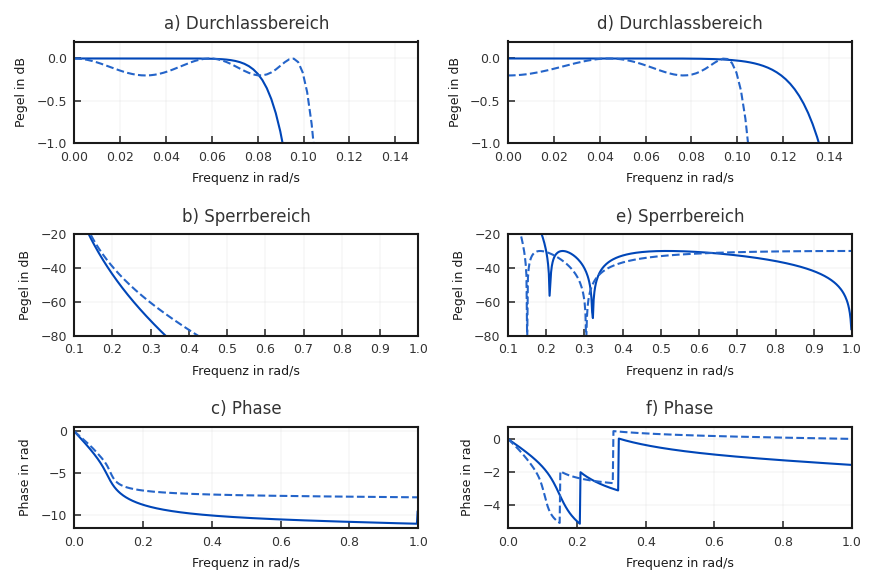

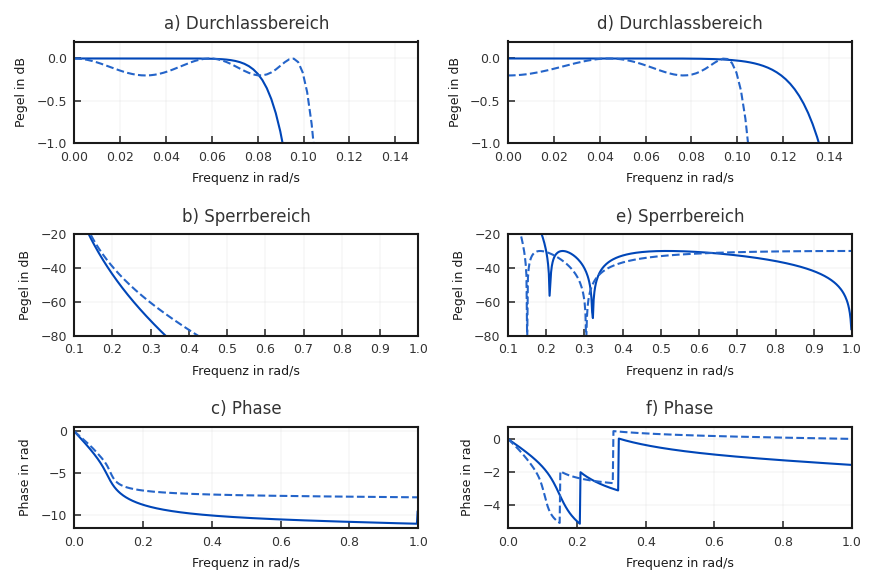

In [12]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   18.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from scipy import signal
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

fig, ((ax_durch_b_c1, ax_durch_c2_c), (ax_sperr_b_c1, ax_sperr_c2_c), 
        (ax_phase_b_c1, ax_phase_c2_c)) = pyplot.subplots(3, 2)

f_s = 48000 

# filter design parameters
order = 4
Pass_freq = 0.1
Pass_dB = 0.2
Stop_freq = 0.2
Stop_dB = 30

# Filter design process: 
#   1. find necessary order for the desired parameters
#   2. use corresponding filter design function, 
#        giving the necessary parameter (not always all of them)
#   3. calculate the transfer function using freqz on the filter coefficients
# displaying:
#   4. show amplitude of transfer function in Pass stop and transition, 
#       using fitting zooms
#   5. show phase. numpy.unwrap for smooth display i.e. no jumps from 2*pi to 0

# Butterworth vs Chebychev-1 filter design
# ----------------------------------------

# Butterworth:
order, wn = signal.buttord(wp=Pass_freq, ws=Stop_freq, 
        gpass=Pass_dB, gstop=Stop_dB)
[b, a] = signal.butter(N=order, Wn=Pass_freq, output='ba')
[w, h] = signal.freqz(b, a)
w = w/numpy.pi

ax_durch_b_c1.plot(w, 20*numpy.log10(numpy.abs(h)))
ax_durch_b_c1.set(xlabel='Frequenz in rad/s', ylabel='Pegel in dB', 
        xlim=[0, 0.15], ylim=[-1, 0.2], title='a) Durchlassbereich')

ax_sperr_b_c1.plot(w, 20*numpy.log10(numpy.abs(h)))
ax_sperr_b_c1.set(xlabel='Frequenz in rad/s', ylabel='Pegel in dB', 
        xlim=[0.1, 1], ylim=[-80, -20], title='b) Sperrbereich')
ax_phase_b_c1.plot(w, numpy.unwrap(p=numpy.angle(h)))
ax_phase_b_c1.set(xlabel='Frequenz in rad/s', ylabel='Phase in rad', 
        xlim=[0, 1], title='c) Phase')

# Cheby1
order, wn = signal.cheb1ord(wp=Pass_freq, ws=Stop_freq, 
        gpass=Pass_dB, gstop=Stop_dB, fs=f_s)
[b, a] = signal.cheby1(N=order, rp=Pass_dB, Wn=Pass_freq, output='ba')
[w, h] = signal.freqz(b, a)
w = w/numpy.pi

ax_durch_b_c1.plot(w, 20*numpy.log10(numpy.abs(h)), linestyle='--')
ax_sperr_b_c1.plot(w, 20*numpy.log10(numpy.abs(h)), linestyle='--')
ax_phase_b_c1.plot(w, numpy.unwrap(p=numpy.angle(h)), linestyle='--')

# Chebychev-2 vs Cauer filter design
# ----------------------------------

# Cheby2
order, wn = signal.cheb2ord(wp=Pass_freq, ws=Stop_freq, 
        gpass=Pass_dB, gstop=Stop_dB, fs=f_s)
[b, a] = signal.cheby2(N=order, rs=Stop_dB, Wn=Stop_freq, output='ba')
[w, h] = signal.freqz(b, a)
w = w/numpy.pi

ax_durch_c2_c.plot(w, 20*numpy.log10(numpy.abs(h)))
ax_durch_c2_c.set(xlabel='Frequenz in rad/s', ylabel='Pegel in dB', 
        xlim=[0, 0.15], ylim=[-1, 0.2], title='d) Durchlassbereich')
ax_sperr_c2_c.plot(w, 20*numpy.log10(numpy.abs(h)))
ax_sperr_c2_c.set(xlabel='Frequenz in rad/s', ylabel='Pegel in dB', 
        xlim=[0.1, 1], ylim=[-80, -20], title='e) Sperrbereich')
ax_phase_c2_c.plot(w, numpy.unwrap(p=numpy.angle(h)))
ax_phase_c2_c.set(xlabel='Frequenz in rad/s', ylabel='Phase in rad', 
        xlim=[0, 1], title='f) Phase')

# Cauer
order, wn = signal.ellipord(wp=Pass_freq, ws=Stop_freq, 
        gpass=Pass_dB, gstop=Stop_dB, fs=f_s)
[b, a] = signal.ellip(N=order, rp=Pass_dB, rs=Stop_dB, 
        Wn=Pass_freq, output='ba')
[w, h] = signal.freqz(b, a)
w = w/numpy.pi

ax_durch_c2_c.plot(w, 20*numpy.log10(numpy.abs(h)), linestyle='--')
ax_sperr_c2_c.plot(w, 20*numpy.log10(numpy.abs(h)), linestyle='--')
ax_phase_c2_c.plot(w, numpy.unwrap(p=numpy.angle(h)),linestyle='--')

pyplot.tight_layout()

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("IIRDesign", fig, display=False)

```{glue:figure} IIRDesign
:figwidth: 75%
:name: "fig:IIRDesign"

Beispiel eines Tiefpass-Entwurfes für verschiedene Entwurfsverfahren.
```

Das Butterworth-Filter hat im Durchlassbereich den erwarteten positiven
flachen Verlauf, der im Sperrbereich zu einer monoton fallenden Dämpfung
führt. Dieses Verhalten im Sperrbereich wird auch vom
Tschebyscheff-I-Filter im Sperrbereich erreicht, wobei trotz der
geringeren Ordnung ein zunächst steilerer Übergang an der Grenzfrequenz
erreicht wird. Beim Tschebyscheff-II-Filter im Durchlassbereich wird
deutlich, dass die Spezifikation übererfüllt wird. Die Grenzfrequenz bei
der der Übergang beginnt, ist verschoben, da beim
Tschebyscheff-II-Design in erster Linie der Sperrbereich erfüllt werden
soll.

Ein bisher nicht beachteter Aspekt ist in den Bildern c und f gezeigt.
Hier wird deutlich, dass die Phase im Übergangsbereich durch das
Cauer-Filter am stärksten verzerrt wird, während das Butterworth-Filter
am ehesten der meistens gewünschten linearen Phase entspricht.

```{admonition} To Do
:class: error
Impuls bzw. Step-Verhalten zur Glättung
```

#### Entwurf von Hochpass, Bandpass und Bandsperr-Filter

Bisher wurden nur Tiefpass-Entwürfe betrachtet. Alle anderen Filter
lassen sich ebenfalls errechnen, wobei die dazu verwendeten
Frequenz-Transformationen (nicht zu verwechseln mit der Fourier-Transformation) erst bei der Betrachtung der analogen
Prototyp-Filter genauer erläutert werden soll.

Für den Entwurf mit Matlab ergibt sich für alle Verfahren das gleiche
Schema. Ein Hochpass-Filter wird durch einen speziellen Schalter (Flag =
"high") angezeigt. Der Bandpass-Entwurf ergibt sich automatisch, wenn
mehr als eine Grenzfrequenz angegeben wird, während die Bandsperre mit
zwei Grenzfrequenzen und einem Flag = "stop" angezeigt wird. Zur
Berechnung der Ordnung reicht es die Grenzfrequenzen zu vertauschen, um
einen Hochpass anzuzeigen.

Beispiel:

`````{tab-set}
````{tab-item} Matlab
```matlab
    % Highpass-Design
    Pass_freq = 0.2; % Matlab uses normalized frequencies from 0..2
    Pass_dB = 0.2;
    Stop_freq = 0.1;
    Stop_dB = 30;

    [N,f_g] = buttord(Pass_freq,Stop_freq,Pass_dB,Stop_dB);
    % Result is 7th Order and f_g = 0.1247
    [b,a] = butter(N,f_g,'high');

    %Bandpass Design
    Pass_freqLow = 0.2; % Matlab uses normalized frequencies from 0..2
    Pass_freqHigh = 0.3; % Matlab uses normalized frequencies from 0..2
    Pass_dB = 0.2;
    Stop_freqLow = 0.1;
    Stop_freqHigh = 0.4;
    Stop_dB = 30;
    [N,f_g] = buttord([Pass_freqLow Pass_freqHigh],[Stop_freqLow Stop_freqHigh],Pass_dB,Stop_dB);
    [b,a] = butter(N,f_g);

    % Bandstop Design
    Pass_freqLow = 0.1; % Matlab uses normalized frequencies from 0..2
    Pass_freqHigh = 0.4; % Matlab uses normalized frequencies from 0..2
    Pass_dB = 0.2;
    Stop_freqLow = 0.2;
    Stop_freqHigh = 0.3;
    Stop_dB = 30;
    [N,f_g] = buttord([Pass_freqLow Pass_freqHigh],[Stop_freqLow Stop_freqHigh],Pass_dB,Stop_dB);
    [b,a] = butter(N,f_g,'stop');
```
````
````{tab-item} Python
```python
    # Highpass Design
    Pass_freq = 0.2
    Pass_dB = 0.2
    Stop_freq = 0.1
    Stop_dB = 30
    order, wn = signal.buttord(wp=Pass_freq, ws=Stop_freq, gpass=Pass_dB, gstop=Stop_dB)
    [b, a] = signal.butter(N=order, Wn=Pass_freq, btype='highpass', output='ba')

    # Bandpass Design
    Pass_freqLow = 0.2
    Pass_freqHigh = 0.3
    Pass_dB = 0.2
    Stop_freqLow = 0.1
    Stop_freqHigh = 0.4
    Stop_dB = 30
    order, wn = signal.buttord(wp=Pass_freq, ws=Stop_freq, gpass=Pass_dB, gstop=Stop_dB)
    [b, a] = signal.butter(N=order, Wn=[Pass_freqLow, Pass_freqHigh], btype='bandpass', output='ba')

    # Bandstop Design
    Pass_freqLow = 0.1
    Pass_freqHigh = 0.4
    Pass_dB = 0.2
    Stop_freqLow = 0.2
    Stop_freqHigh = 0.3
    Stop_dB = 30 
    order, wn = signal.buttord(wp=Pass_freq, ws=Stop_freq, gpass=Pass_dB, gstop=Stop_dB)
    [b, a] = signal.butter(N=order, Wn=[Pass_freqLow, Pass_freqHigh], btype='bandstop', output='ba')
```
````
`````

## Übungen

### Wiederholung des Stoffes und einfache Rechenaufgaben

1.  Nennen Sie jeweils eine mögliche Anwendung (am besten aus dem
    Bereich der Audiotechnik, Hörtechnik, Audiologie) für die
    verschiedenen Grundcharakteristika und überlegen sich, wie die
    Entwurfsparamter aussehen könnten (Grenzfrequenz, Ordnung)

2.  Geben Sie zu folgendem Blockschaltbild die Differenzengleichung an.

```{figure} ../images/psUeb/IIr_2terOrdnung.png
---
width: 30%
name: fig:IIr_2terOrdnung
---
Blockschaltbild eines Systems
```

3.  Welche Vor- und Nachteile ergeben sich durch das Overlap-Add
    Verfahren zur schnellen Faltung?

4.  Zeichnen Sie zu den folgenden Systemen eine Realisierung als
    Blockschaltbild

    1.  $y(k) = x(k) - \alpha y(k-1)$

    2.  $y(k) =  0.3 x(k) + 07 x(k-1) + 1.9812 y(k-1)   - 1.0201 y(k-2)$

### Aufgaben (Auf Klausurniveau)

1.  Berechnen Sie die Übertragungsfunktion der Impulsantwort
    $h(k) = [-1 \;\; 1]$! Skizzieren Sie den Betrags- und Phasengang! Um
    was für einen Filtertyp handelt es sich (Realisierungsform und
    Filtercharakteristik)?

2.  Sie sehen die folgende Impulsantwort. Um was für ein Filter handelt
    es sich (Realisierung und Filtercharakteristik)? Berechnen Sie die
    Übertragungsfunktion und skizzieren Sie den Betrags- und
    Phasenverlauf! Was ist besonders an diesem Filter und könnte es
    realisiert werden?


```{figure} ../images/psUeb/KlausurWS2003_2IR.png
---
width: 20%
name: fig:KlausurWS2003_2IR
```

3.  Gegeben ist das folgende System
    
    $$
    y(k) = 2x(k) + 2x(k-1) - 2x(k-3) - 2x(k-4)
    $$ 
    
    Berechnen Sie die
    Übertragungsfunktion nach Betrag und Phase! Skizzieren Sie den
    Betrags- und Phasenverlauf zwischen 0 und $\pi$! Um was für einen
    Typ Filter handelt es sich? Zeichnen Sie eine möglichst effiziente
    Realisierung als Blockschaltbild!

4.  Skizzieren Sie den Betragsverlauf zu dem hier vorliegenden
    Pol-Nullstellenplan! Welche besonderen Eigenschaften hat dieses
    System? Geben Sie die Übertragungsfunktion $H(z)$ als Funktion von
    Biquads an. Nehmen Sie an, die Radien für die Pole und Nullstellen
    betragen $0.9$ bzw $1.1$ und $b_0 = 1$.


```{figure} ../images/psUeb/PZ_18_25_28.png
---
width: 50%
name: fig:PZ_18_25_28
---
Subtitle
```

5.  Wie lautet die Differenzengleichung und die Übertragungsfunktion des
    folgenden Systems nach Betrag und Phase? Zeichnen Sie den Betrags-
    und Phasenverlauf! Um was für eine Art Filter handelt es sich? (Typ
    und Realisierungsform)


```{figure} ../images/psUeb/FIR_zweiterOrdnung.png
---
width: 50%
name: fig:FIR_zweiterOrdnung
```

### Matlab-Aufgaben

1.  Realisieren Sie eine Funktion, die die Koeffizienten eines mit der
    Fenstermethode entworfenen Tiefpasses zurückgibt. Als
    Übergabeparameter sollten die Grenzfrequenz, die Ordnung und das zu
    verwendende Fenster zur Verfügung stehen. Als Standard-Fenster soll
    das Rechteck-Fenster verwendet werden.

2.  Schreiben Sie eine Funktion, die aus einem beliebigen FIR-Filter
    eine minimalphasige Realisierung macht, wobei die
    Betragsübertragungsfunktion exakt erhalten bleiben soll. Die
    Übergabeparameter sind nur die bisher verwendeten FIR-Koeffizienten.

### Transfer-Leistung

1.  Überlegen Sie eine weitere kanonische Struktur für SOS-Filter.

2.  Nehmen wir an beim OLA-Verfahren wechselt die Übertragungsfunktion
    während der Datenvektor noch nicht vollständig bearbeitet wurde
    (Zeitvariantes Verhalten). Was glauben Sie ist die Folge? Können Sie
    sich vorstellen, wie man die auftretenden Probleme lösen kann?

## Zusammenfassung

Die wichtigen Erkenntnisse aus diesem Kapitel sind:

-   LTI-Systeme ergeben für alle nicht-trivialen Fälle eine Filterung
    des Signals. Die Filterwirkung kann, muss aber nicht Ziel der
    Signalverarbeitung sein. Beispiel: gleitender Mittelwert. Ziel ist
    Mittelung, Nebenwirkung ist Filterung.

-   Das ideale Tiefpass-Filter ist nicht realisierbar. Die Impulsantwort
    ist durch die si-Funktion gegeben und deshalb nicht-kausal und
    unendlich ausgedehnt.

-   Man unterscheidet FIR (Finite Impulse Response) und IIR (Infinite
    Impulse Response)-Filter.

-   FIR-Filter können durch Abschneiden und Verschieben der idealen
    Imulsantwort approximiert werden. Es ergeben sich durch diesen
    Entwurf immer linearphasige Filter.

-   Es gibt 4 unterschiedliche linearphasige Filter, die sich durch die
    Symmetrie der Filterkoeffizienten unterscheiden.

-   Nur mit dem Typ I Filter lassen sich alle Filtercharakteristike
    realisieren.

-   Minimalphasige Filter können aus dem linearphasigen Entwurf
    berechnet werden.

-   IIR-Filter werden zur Realisierung in Systeme 2ter Ordnung (Second
    Order Sections (SOS)) zerlegt.

-   Die konkrete Realisierung eines Filters kann als Blockschaltbild
    dargestellt werden

-   Für IIR Filter gibt es unterschiedliche Strukturen mit gleicher
    Filterwirkung. Strukturen mit einer minimalen Anzahl an
    Speicherplätzen werden kanonisch genannt.

-   Die geschickteste Realisierung zur FIR-Filterung langer Signale und
    hoher Filterordnungen erfolgt mit der Overlap Add Methode.

-   Matlab bietet viele Hilfsmittel für den Entwurf von IIR-Filtern.

[^3]: Die Ordnung ist $M$, somit hat das Filter $M+1$ Koeffizienten, die
    Faltung ergibt dann $L+M+1-1$ Ausgangswerte.